In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pickle as cPickle
import pandas as pd
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from keras.layers import LSTM, Dense, TimeDistributed, Bidirectional
import sklearn.metrics
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.layers import concatenate
from tensorflow.keras import Model
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional
from keras import models

In [ ]:
data_student = "/content/drive/MyDrive/Tap_Chi_T.Khanh/Data/Data for Student/"
data_teacher = "/content/drive/MyDrive/Tap_Chi_T.Khanh/Data/Data for teacher/"
path = "/content/drive/MyDrive/Tap_Chi_T.Khanh/Result_1_1/"

In [ ]:
def twoTupleDic3():
    AA_list_sort = ['G','A','V','L','I','M','P','F','W','S','T','N','Q','Y','C','K','R','H','D','E','X']

    AA_dict = {}
    numm = 1
    for i in AA_list_sort:
        for j in AA_list_sort:
          for jj in AA_list_sort:
             AA_dict[i+j+jj] = numm
             numm += 1
    return AA_dict
def twoTupleDic2():
    AA_list_sort = ['G','A','V','L','I','M','P','F','W','S','T','N','Q','Y','C','K','R','H','D','E','X']

    AA_dict = {}
    numm = 1
    for i in AA_list_sort:
        for j in AA_list_sort:
          AA_dict[i+j] = numm
          numm += 1
    return AA_dict

def twoTupleDic1():
    AA_list_sort = ['G','A','V','L','I','M','P','F','W','S','T','N','Q','Y','C','K','R','H','D','E','X']

    AA_dict = {}
    numm = 1
    for i in AA_list_sort:
        AA_dict[i] = numm
        numm += 1
    return AA_dict
def ProSentence(pro, K):
	sentence = ""
	length = len(pro)
	for i in range(length - K + 1):
		sentence += pro[i: i + K] + " "
    #delete extra space
	sentence = sentence[0 : len(sentence) - 1]
	return sentence
k =1#1-gram
word_index1 = twoTupleDic1()
vocab_size = len(word_index1)
num_folds = 5
TIME_STEPS = 33
INPUT_SIZE = 300

**Load data for teacher training**

In [ ]:
# Load Traindata
file_train_teacher = "train_data_3speaces_31.csv"
df_train_teacher =pd.read_csv(data_teacher +file_train_teacher, delimiter= ',')
texts_train_teacher =[] #PTMsequend kmer
for i in df_train_teacher['Sequence']:
  temp = ProSentence(i,k) # Biểu diễn dữ liệu đầu vào thành token Kmer
  texts_train_teacher.append(temp)
df_train_teacher['k_mer'] =texts_train_teacher
train_sequences_teacher = []
for each in texts_train_teacher:
    each_index_list = []
    each = each.split(' ')
    for i in each:
        each_index_list.append(word_index1[i])
    train_sequences_teacher.append(each_index_list)
# Tokenizer train data input Word2vec
data_token_teacher = []
for i in df_train_teacher['k_mer']:
   data_token_teacher.append(i.split())

# Len of the K_mer[1]

MAX_SEQUENCE_LENGTH_teacher = len(data_token_teacher[1])

Xtrain_teacher = pad_sequences(train_sequences_teacher, maxlen=MAX_SEQUENCE_LENGTH_teacher)
ytrain_teacher = np.array(df_train_teacher['Label'])
Xtrain_teacher.shape
ytrain_teacher = np.array(ytrain_teacher)

# perform one-hot encoding on the labels
lb = LabelBinarizer()
ytrain_teacher = lb.fit_transform(ytrain_teacher)
ytrain_teacher = to_categorical(ytrain_teacher)
ytrain_teacher.shape

(6746, 2)

In [ ]:
# load test data for teacher
file_test_teacher ="test_data_3speaces_31.csv"
df_test_teacher =pd.read_csv(data_teacher+file_test_teacher,delimiter= ',')
text_test_teacher =[] #PTMsequend kmer
for i in df_test_teacher['Sequence']:
  temp = ProSentence(i,k) # Biểu diễn dữ liệu đầu vào thành token Kmer
  text_test_teacher.append(temp)
df_test_teacher['k_mer'] =text_test_teacher

test_sequences_teacher = []
for each in text_test_teacher:
    each_index_list = []
    each = each.split(' ')
    for i in each:
        each_index_list.append(word_index1[i])
    test_sequences_teacher.append(each_index_list)

Xtest_teacher = pad_sequences(test_sequences_teacher, maxlen=MAX_SEQUENCE_LENGTH_teacher)
ytest_teacher = np.array(df_test_teacher['Label'])
Xtest_teacher.shape
ytest_teacher = np.array(ytest_teacher)
# perform one-hot encoding on the labels
lb = LabelBinarizer()
ytest_teacher= lb.fit_transform(ytest_teacher)
ytest_teacher = to_categorical(ytest_teacher)
ytest_teacher.shape

(1500, 2)

**Load data for Student training**

In [ ]:
# Load Traindata
import pandas as pd
file_train_student = "train_data_31_Arathailiana_1_1.csv"
df_train_student =pd.read_csv(data_student+file_train_student, delimiter= ',')

texts_train_student =[] #PTMsequend kmer
for i in df_train_student['Sequence']:
  temp = ProSentence(i,k)
  texts_train_student.append(temp)
df_train_student['k_mer'] =texts_train_student
train_sequences_student = []
for each in texts_train_student:
    each_index_list = []
    each = each.split(' ')
    for i in each:
        each_index_list.append(word_index1[i])
    train_sequences_student.append(each_index_list)
# Tokenizer train data input Word2vec
data_token_student = []
for i in df_train_student['k_mer']:
   data_token_student.append(i.split())

MAX_SEQUENCE_LENGTH_student = len(data_token_student[1])
Xtrain_student = pad_sequences(train_sequences_student, maxlen=MAX_SEQUENCE_LENGTH_student)
ytrain_student = np.array(df_train_student['Label'])
ytrain_student = np.array(ytrain_student)
# perform one-hot encoding on the labels
lb = LabelBinarizer()
ytrain_student = lb.fit_transform(ytrain_student)
ytrain_student = to_categorical(ytrain_student)
ytrain_student.shape


(3064, 2)

In [ ]:
# load test data for student
file_test_student ="test_data_31_Arathailiana_1_1.csv"
df_test_student =pd.read_csv(data_student+file_test_student,delimiter= ',')
text_test_student =[] #PTMsequend kmer
for i in df_test_student['Sequence']:
  temp = ProSentence(i,k)
  text_test_student.append(temp)
df_test_student['k_mer'] =text_test_student

test_sequences_student = []
for each in text_test_student:
    each_index_list = []
    each = each.split(' ')
    for i in each:
        each_index_list.append(word_index1[i])
    test_sequences_student.append(each_index_list)

Xtest_student = pad_sequences(test_sequences_student, maxlen=MAX_SEQUENCE_LENGTH_student)
ytest_student = np.array(df_test_student['Label'])
# perform one-hot encoding on the labels
ytest_student = np.array(ytest_student)
lb = LabelBinarizer()
ytest_student= lb.fit_transform(ytest_student)
ytest_student = to_categorical(ytest_student)
ytest_student.shape

(1022, 2)

**Define model**

In [ ]:
class Distiller(keras.Model):
    def __init__(self, student, teacher):
        super().__init__()
        self.teacher = teacher
        self.student = student

    def compile(
        self,
        optimizer,
        metrics,
        student_loss_fn,
        distillation_loss_fn,
        alpha=0.1,
        temperature=3,
    ):
        """ Configure the distiller.

        Args:
            optimizer: Keras optimizer for the student weights
            metrics: Keras metrics for evaluation
            student_loss_fn: Loss function of difference between student
                predictions and ground-truth
            distillation_loss_fn: Loss function of difference between soft
                student predictions and soft teacher predictions
            alpha: weight to student_loss_fn and 1-alpha to distillation_loss_fn
            temperature: Temperature for softening probability distributions.
                Larger temperature gives softer distributions.
        """
        super().compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.alpha = alpha
        self.temperature = temperature

    def train_step(self, data):
        # Unpack data
        x, y = data

        # Forward pass of teacher
        teacher_predictions = self.teacher(x, training=False)

        with tf.GradientTape() as tape:
            # Forward pass of student
            student_predictions = self.student(x, training=True)

            # Compute losses
            student_loss = self.student_loss_fn(y, student_predictions)

            # Compute scaled distillation loss from https://arxiv.org/abs/1503.02531
            # The magnitudes of the gradients produced by the soft targets scale
            # as 1/T^2, multiply them by T^2 when using both hard and soft targets.
            distillation_loss = (
                self.distillation_loss_fn(
                    tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
                    tf.nn.softmax(student_predictions / self.temperature, axis=1),
                )
                * self.temperature**2
            )

            loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss

        # Compute gradients
        trainable_vars = self.student.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # Update the metrics configured in `compile()`.
        self.compiled_metrics.update_state(y, student_predictions)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update(
            {"student_loss": student_loss, "distillation_loss": distillation_loss}
        )
        return results

    def test_step(self, data):
        # Unpack the data
        x, y = data

        # Compute predictions
        y_prediction = self.student(x, training=False)

        # Calculate the loss
        student_loss = self.student_loss_fn(y, y_prediction)

        # Update the metrics.
        self.compiled_metrics.update_state(y, y_prediction)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update({"student_loss": student_loss})
        return results
teacher = keras.Sequential(
    [
        layers.Embedding(vocab_size+1, 300, input_length=MAX_SEQUENCE_LENGTH_teacher,trainable=True),
        #layers.Embedding(len(embedding_matrix), EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH_teacher,trainable=True),
        layers.Bidirectional(LSTM(units=32,batch_input_shape=(None,TIME_STEPS, INPUT_SIZE),return_sequences=True)),
        layers.Dropout(0.2),
        layers.Flatten(),
        layers.Dense(128),
        layers.Activation('relu'),
        layers.Dropout(0.2),
        layers.Dense(2),
        layers.Activation('softmax'),
    ],
    name="teacher",
)

teacher.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=[
        "categorical_accuracy",
        "AUC",

    ],
    optimizer=keras.optimizers.AdamW(learning_rate=0.0001),
)
student = keras.Sequential(
    [
        layers.Embedding(vocab_size+1, 300, input_length=MAX_SEQUENCE_LENGTH_student,trainable=True),
        #layers.Embedding(len(embedding_matrix), EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH_student,trainable=True),
        layers.Bidirectional(LSTM(units=16,batch_input_shape=(None,TIME_STEPS, INPUT_SIZE),return_sequences=True)),
        layers.Dropout(0.2),
        layers.Flatten(),
        layers.Dense(128),
        layers.Activation('relu'),
        layers.Dropout(0.2),
        layers.Dense(2),
        layers.Activation('softmax'),
    ],
    name="student",
)
student_scratch = keras.models.clone_model(student)

In [ ]:
checkpoint = EarlyStopping(monitor='val_loss',
            min_delta=0,
            patience=3,
            verbose=1, mode='auto')
result_test =path +"Result_KD2_1gram.txt"


Knowledge Distillation base on BiLSTM

In [ ]:
# Train teacher and save model
teacher.fit(Xtrain_teacher, ytrain_teacher, batch_size=16, epochs=50,validation_data =(Xtest_teacher, ytest_teacher), shuffle = True,callbacks=[checkpoint],verbose=1)
teacher.save(path +"teacher_KD2_1gram.h5")

Epoch 1/50
422/422 [==============================] - 14s 24ms/step - loss: 0.5990 - categorical_accuracy: 0.6862 - auc: 0.7491 - val_loss: 0.5459 - val_categorical_accuracy: 0.7513 - val_auc: 0.8048
Epoch 2/50
422/422 [==============================] - 8s 19ms/step - loss: 0.5475 - categorical_accuracy: 0.7363 - auc: 0.7993 - val_loss: 0.5040 - val_categorical_accuracy: 0.7647 - val_auc: 0.8424
Epoch 3/50
422/422 [==============================] - 8s 19ms/step - loss: 0.5309 - categorical_accuracy: 0.7496 - auc: 0.8135 - val_loss: 0.4907 - val_categorical_accuracy: 0.7973 - val_auc: 0.8575
Epoch 4/50
422/422 [==============================] - 8s 19ms/step - loss: 0.5146 - categorical_accuracy: 0.7554 - auc: 0.8271 - val_loss: 0.4705 - val_categorical_accuracy: 0.8007 - val_auc: 0.8683
Epoch 5/50
422/422 [==============================] - 8s 19ms/step - loss: 0.4971 - categorical_accuracy: 0.7757 - auc: 0.8406 - val_loss: 0.4496 - val_categorical_accuracy: 0.8107 - val_auc: 0.8836
Epoc

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Independent test Knowlege distillation model
#Load model teacher for train student
teacher_model = models.load_model(path+'teacher_KD2_1gram.h5')
distiller = Distiller(student=student, teacher=teacher_model)
distiller.compile(
      student_loss_fn= keras.losses.CategoricalCrossentropy(from_logits=True),
      #student_loss_fn= keras.losses.BinaryCrossentropy(from_logits=True),
      optimizer=keras.optimizers.AdamW(learning_rate = 0.0001),
      metrics=[
              "categorical_accuracy",
              "AUC",
              ], # , f1
      distillation_loss_fn=keras.losses.KLDivergence(),
      alpha=0.1,
      temperature=10
      )

history_KD = distiller.fit(Xtrain_student,ytrain_student, batch_size=16,epochs=50)#, validation_data =(Xtest_student, ytest_student), callbacks=[checkpoint],verbose=1)
result2 = distiller.evaluate(Xtest_student, ytest_student)#, validation_data=(X_test,Y_test), shuffle = True,callbacks=[checkpoint],verbose=1)
f = open(result_test, 'a+', encoding='UTF-8')
f.write("\n Independent test  \n ")
s = str(result2)
f.write(s)
f.close()

ypred = student.predict(Xtest_student)
ypred =np.argmax(ypred,axis =1)

ytest_true =  np.argmax(ytest_student,axis =1)

result22 = confusion_matrix(ytest_true,ypred)
print(result22)
f = open(result_test, 'a+', encoding='UTF-8')
f.write("\n confusion_matrix \n ")
s = str(result22)
f.write(s)
f.close()
# save model student
student.save(path +"KD2_1gram.h5")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


192/192 [==============================] - 9s 17ms/step - categorical_accuracy: 0.6527 - auc: 0.7223 - student_loss: 0.6292 - distillation_loss: 0.0459
Epoch 2/50
192/192 [==============================] - 3s 17ms/step - categorical_accuracy: 0.7787 - auc: 0.8402 - student_loss: 0.5032 - distillation_loss: 0.0284
Epoch 3/50
192/192 [==============================] - 3s 17ms/step - categorical_accuracy: 0.7911 - auc: 0.8628 - student_loss: 0.4680 - distillation_loss: 0.0259
Epoch 4/50
192/192 [==============================] - 4s 19ms/step - categorical_accuracy: 0.7996 - auc: 0.8771 - student_loss: 0.4479 - distillation_loss: 0.0234
Epoch 5/50
192/192 [==============================] - 4s 19ms/step - categorical_accuracy: 0.8114 - auc: 0.8926 - student_loss: 0.4214 - distillation_loss: 0.0210
Epoch 6/50
192/192 [==============================] - 4s 19ms/step - categorical_accuracy: 0.8231 - auc: 0.9074 - student_loss: 0.3973 - distillation_loss: 0.0177
Epoch 7/50
192/192 [=============

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[[431  80]
 [ 60 451]]


In [ ]:
#  Cross validation Knowlege distillation model
kf = KFold(n_splits=num_folds, shuffle=True)

X_teacher = Xtrain_teacher
Y_teacher = ytrain_teacher
X_student = Xtrain_student
Y_student = ytrain_student
model_teacher_cv = models.load_model(path+'teacher_KD2_1gram.h5')
fold_idx =1
for train_index_student, test_index_student in kf.split(X_student,Y_student):
    X_train_student, X_test_student =X_student[train_index_student], X_student[test_index_student]
    Y_train_student, Y_test_student = Y_student[train_index_student], Y_student[test_index_student]
# Create the student
    print("Start train Fold ", fold_idx)
    student = keras.Sequential(
    [
        layers.Embedding(vocab_size+1, 300, input_length=MAX_SEQUENCE_LENGTH_student,trainable=True),
        #layers.Embedding(len(embedding_matrix), EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH_student,trainable=True),
        layers.Bidirectional(LSTM(units=16,batch_input_shape=(None,TIME_STEPS, INPUT_SIZE),return_sequences=True)),
        layers.Dropout(0.2),
        layers.Flatten(),
        layers.Dense(128),
        layers.Activation('relu'),
        layers.Dropout(0.2),
        layers.Dense(2),
        layers.Activation('softmax'),
    ],
    name="student",
    )
    student_scratch = keras.models.clone_model(student)
    distiller = Distiller(student=student, teacher= model_teacher_cv)
    distiller.compile(
          student_loss_fn= keras.losses.CategoricalCrossentropy(from_logits=True),
          #student_loss_fn= keras.losses.BinaryCrossentropy(from_logits=True),
          optimizer=keras.optimizers.Adam(learning_rate = 0.0001),
          metrics=[
                  "categorical_accuracy",
                  "AUC",
                  ], # , f1
          distillation_loss_fn=keras.losses.KLDivergence(),
          alpha=0.1,
          temperature=10
    )
    history_KD = distiller.fit(X_train_student, Y_train_student, batch_size=16, validation_data =(X_test_student, Y_test_student), epochs=100, callbacks=[checkpoint],verbose=1)
    result2 = distiller.evaluate(X_test_student, Y_test_student)#, validation_data=(X_test,Y_test), shuffle = True,callbacks=[checkpoint],verbose=1)
    f = open(result_test, 'a+', encoding='UTF-8')
    f.write("\n KD_model fold: \n")
    f.write(str(fold_idx))
    s = str(result2)
    f.write(s)
    f.close()


    ypred = student.predict(X_test_student)
    ypred =np.argmax(ypred,axis =1)

    ytest_true = np.argmax(Y_test_student,axis =1)

    result22 = confusion_matrix(ytest_true,ypred)
    print(result22)
    f = open(result_test, 'a+', encoding='UTF-8')
    f.write("\n Fold Confusion_matric: \n ")
    s = str(result22)
    f.write(s)
    f.close()
    fold_idx = fold_idx +1

Start train Fold  1
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.5667 - auc: 0.6316 - student_loss: 0.6642 - distillation_loss: 0.0479

154/154 [==============================] - 6s 18ms/step - categorical_accuracy: 0.5667 - auc: 0.6316 - student_loss: 0.6635 - distillation_loss: 0.0479 - val_categorical_accuracy: 0.7586 - val_auc: 0.8156 - val_student_loss: 0.5951
Epoch 2/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.7589 - auc: 0.8168 - student_loss: 0.5392 - distillation_loss: 0.0260

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.7589 - auc: 0.8168 - student_loss: 0.5413 - distillation_loss: 0.0259 - val_categorical_accuracy: 0.7847 - val_auc: 0.8411 - val_student_loss: 0.6015
Epoch 3/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.7798 - auc: 0.8474 - student_loss: 0.4917 - distillation_loss: 0.0221

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.7789 - auc: 0.8472 - student_loss: 0.4877 - distillation_loss: 0.0219 - val_categorical_accuracy: 0.7879 - val_auc: 0.8741 - val_student_loss: 0.4192
Epoch 4/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.7919 - auc: 0.8621 - student_loss: 0.4671 - distillation_loss: 0.0207

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.7919 - auc: 0.8621 - student_loss: 0.4662 - distillation_loss: 0.0206 - val_categorical_accuracy: 0.7945 - val_auc: 0.8780 - val_student_loss: 0.4667
Epoch 5/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8005 - auc: 0.8714 - student_loss: 0.4520 - distillation_loss: 0.0192

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8021 - auc: 0.8723 - student_loss: 0.4484 - distillation_loss: 0.0191 - val_categorical_accuracy: 0.8026 - val_auc: 0.8897 - val_student_loss: 0.3978
Epoch 6/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8117 - auc: 0.8852 - student_loss: 0.4308 - distillation_loss: 0.0176

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8115 - auc: 0.8847 - student_loss: 0.4391 - distillation_loss: 0.0177 - val_categorical_accuracy: 0.8140 - val_auc: 0.8926 - val_student_loss: 0.4295
Epoch 7/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8303 - auc: 0.8983 - student_loss: 0.4079 - distillation_loss: 0.0155

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8307 - auc: 0.8987 - student_loss: 0.4049 - distillation_loss: 0.0153 - val_categorical_accuracy: 0.8303 - val_auc: 0.9083 - val_student_loss: 0.3461
Epoch 8/100
152/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8322 - auc: 0.9084 - student_loss: 0.3906 - distillation_loss: 0.0134

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8327 - auc: 0.9084 - student_loss: 0.3881 - distillation_loss: 0.0133 - val_categorical_accuracy: 0.8401 - val_auc: 0.9156 - val_student_loss: 0.3283
Epoch 9/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8440 - auc: 0.9147 - student_loss: 0.3761 - distillation_loss: 0.0120

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8441 - auc: 0.9148 - student_loss: 0.3742 - distillation_loss: 0.0119 - val_categorical_accuracy: 0.8434 - val_auc: 0.9173 - val_student_loss: 0.3102
Epoch 10/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8423 - auc: 0.9172 - student_loss: 0.3697 - distillation_loss: 0.0117

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8429 - auc: 0.9175 - student_loss: 0.3716 - distillation_loss: 0.0116 - val_categorical_accuracy: 0.8450 - val_auc: 0.9198 - val_student_loss: 0.3079
Epoch 11/100
152/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8520 - auc: 0.9243 - student_loss: 0.3545 - distillation_loss: 0.0118

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8511 - auc: 0.9234 - student_loss: 0.3536 - distillation_loss: 0.0118 - val_categorical_accuracy: 0.8418 - val_auc: 0.9149 - val_student_loss: 0.3436
Epoch 12/100
152/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8512 - auc: 0.9234 - student_loss: 0.3542 - distillation_loss: 0.0113

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8511 - auc: 0.9234 - student_loss: 0.3580 - distillation_loss: 0.0113 - val_categorical_accuracy: 0.8434 - val_auc: 0.9232 - val_student_loss: 0.3057
Epoch 13/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8531 - auc: 0.9258 - student_loss: 0.3516 - distillation_loss: 0.0109

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8531 - auc: 0.9258 - student_loss: 0.3542 - distillation_loss: 0.0108 - val_categorical_accuracy: 0.8401 - val_auc: 0.9238 - val_student_loss: 0.2832
Epoch 14/100
150/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8550 - auc: 0.9270 - student_loss: 0.3472 - distillation_loss: 0.0107

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8548 - auc: 0.9276 - student_loss: 0.3479 - distillation_loss: 0.0107 - val_categorical_accuracy: 0.8303 - val_auc: 0.9164 - val_student_loss: 0.3705
Epoch 15/100
152/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8549 - auc: 0.9270 - student_loss: 0.3460 - distillation_loss: 0.0106

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8556 - auc: 0.9274 - student_loss: 0.3434 - distillation_loss: 0.0110 - val_categorical_accuracy: 0.8401 - val_auc: 0.9236 - val_student_loss: 0.2981
Epoch 16/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8558 - auc: 0.9291 - student_loss: 0.3420 - distillation_loss: 0.0106

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8560 - auc: 0.9292 - student_loss: 0.3400 - distillation_loss: 0.0107 - val_categorical_accuracy: 0.8418 - val_auc: 0.9267 - val_student_loss: 0.2762
Epoch 17/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8623 - auc: 0.9336 - student_loss: 0.3322 - distillation_loss: 0.0104

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8621 - auc: 0.9335 - student_loss: 0.3348 - distillation_loss: 0.0103 - val_categorical_accuracy: 0.8385 - val_auc: 0.9232 - val_student_loss: 0.3040
Epoch 18/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8623 - auc: 0.9355 - student_loss: 0.3279 - distillation_loss: 0.0100

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8625 - auc: 0.9355 - student_loss: 0.3275 - distillation_loss: 0.0100 - val_categorical_accuracy: 0.8467 - val_auc: 0.9263 - val_student_loss: 0.2794
Epoch 19/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8638 - auc: 0.9354 - student_loss: 0.3280 - distillation_loss: 0.0102

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8641 - auc: 0.9354 - student_loss: 0.3296 - distillation_loss: 0.0100 - val_categorical_accuracy: 0.8483 - val_auc: 0.9246 - val_student_loss: 0.2981
Epoch 20/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8650 - auc: 0.9367 - student_loss: 0.3240 - distillation_loss: 0.0101

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8650 - auc: 0.9367 - student_loss: 0.3230 - distillation_loss: 0.0100 - val_categorical_accuracy: 0.8564 - val_auc: 0.9296 - val_student_loss: 0.2476
Epoch 21/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8647 - auc: 0.9360 - student_loss: 0.3255 - distillation_loss: 0.0100

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8654 - auc: 0.9365 - student_loss: 0.3209 - distillation_loss: 0.0109 - val_categorical_accuracy: 0.8483 - val_auc: 0.9274 - val_student_loss: 0.2765
Epoch 22/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8664 - auc: 0.9372 - student_loss: 0.3245 - distillation_loss: 0.0098

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8666 - auc: 0.9373 - student_loss: 0.3235 - distillation_loss: 0.0097 - val_categorical_accuracy: 0.8450 - val_auc: 0.9204 - val_student_loss: 0.3019
Epoch 23/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8609 - auc: 0.9370 - student_loss: 0.3236 - distillation_loss: 0.0100

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8617 - auc: 0.9375 - student_loss: 0.3220 - distillation_loss: 0.0101 - val_categorical_accuracy: 0.8467 - val_auc: 0.9307 - val_student_loss: 0.2332
Epoch 24/100
152/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8734 - auc: 0.9405 - student_loss: 0.3158 - distillation_loss: 0.0100

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8715 - auc: 0.9392 - student_loss: 0.3241 - distillation_loss: 0.0099 - val_categorical_accuracy: 0.8336 - val_auc: 0.9184 - val_student_loss: 0.3047
Epoch 25/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8645 - auc: 0.9400 - student_loss: 0.3172 - distillation_loss: 0.0100

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8645 - auc: 0.9400 - student_loss: 0.3171 - distillation_loss: 0.0100 - val_categorical_accuracy: 0.8548 - val_auc: 0.9283 - val_student_loss: 0.2408
Epoch 26/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8671 - auc: 0.9414 - student_loss: 0.3142 - distillation_loss: 0.0098

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8670 - auc: 0.9413 - student_loss: 0.3120 - distillation_loss: 0.0097 - val_categorical_accuracy: 0.8499 - val_auc: 0.9301 - val_student_loss: 0.2267
Epoch 27/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8711 - auc: 0.9419 - student_loss: 0.3137 - distillation_loss: 0.0099

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8711 - auc: 0.9419 - student_loss: 0.3149 - distillation_loss: 0.0101 - val_categorical_accuracy: 0.8450 - val_auc: 0.9313 - val_student_loss: 0.2099
Epoch 28/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8733 - auc: 0.9450 - student_loss: 0.3061 - distillation_loss: 0.0096

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8739 - auc: 0.9449 - student_loss: 0.3092 - distillation_loss: 0.0096 - val_categorical_accuracy: 0.8467 - val_auc: 0.9263 - val_student_loss: 0.2386
Epoch 29/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8698 - auc: 0.9413 - student_loss: 0.3117 - distillation_loss: 0.0095

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8698 - auc: 0.9413 - student_loss: 0.3101 - distillation_loss: 0.0095 - val_categorical_accuracy: 0.8450 - val_auc: 0.9265 - val_student_loss: 0.2430
Epoch 30/100
152/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8750 - auc: 0.9445 - student_loss: 0.3065 - distillation_loss: 0.0094

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8739 - auc: 0.9436 - student_loss: 0.3068 - distillation_loss: 0.0095 - val_categorical_accuracy: 0.8434 - val_auc: 0.9245 - val_student_loss: 0.2512
Epoch 31/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8721 - auc: 0.9456 - student_loss: 0.3037 - distillation_loss: 0.0093

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8723 - auc: 0.9457 - student_loss: 0.3022 - distillation_loss: 0.0092 - val_categorical_accuracy: 0.8564 - val_auc: 0.9301 - val_student_loss: 0.2235
Epoch 32/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8713 - auc: 0.9457 - student_loss: 0.3038 - distillation_loss: 0.0094

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8723 - auc: 0.9462 - student_loss: 0.3019 - distillation_loss: 0.0094 - val_categorical_accuracy: 0.8548 - val_auc: 0.9306 - val_student_loss: 0.2035
Epoch 33/100
150/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8725 - auc: 0.9444 - student_loss: 0.3056 - distillation_loss: 0.0093

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8735 - auc: 0.9450 - student_loss: 0.3046 - distillation_loss: 0.0094 - val_categorical_accuracy: 0.8581 - val_auc: 0.9320 - val_student_loss: 0.2134
Epoch 34/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8701 - auc: 0.9475 - student_loss: 0.3007 - distillation_loss: 0.0094

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8703 - auc: 0.9476 - student_loss: 0.2984 - distillation_loss: 0.0100 - val_categorical_accuracy: 0.8548 - val_auc: 0.9331 - val_student_loss: 0.1890
Epoch 35/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8762 - auc: 0.9466 - student_loss: 0.3001 - distillation_loss: 0.0096

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8747 - auc: 0.9467 - student_loss: 0.3014 - distillation_loss: 0.0096 - val_categorical_accuracy: 0.8646 - val_auc: 0.9305 - val_student_loss: 0.2089
Epoch 36/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8746 - auc: 0.9479 - student_loss: 0.2979 - distillation_loss: 0.0092

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8747 - auc: 0.9480 - student_loss: 0.2973 - distillation_loss: 0.0091 - val_categorical_accuracy: 0.8613 - val_auc: 0.9330 - val_student_loss: 0.1966
Epoch 37/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8750 - auc: 0.9486 - student_loss: 0.2969 - distillation_loss: 0.0093

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8752 - auc: 0.9486 - student_loss: 0.2959 - distillation_loss: 0.0094 - val_categorical_accuracy: 0.8467 - val_auc: 0.9330 - val_student_loss: 0.1714
Epoch 38/100
150/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8783 - auc: 0.9488 - student_loss: 0.2961 - distillation_loss: 0.0094

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8768 - auc: 0.9482 - student_loss: 0.2992 - distillation_loss: 0.0092 - val_categorical_accuracy: 0.8564 - val_auc: 0.9322 - val_student_loss: 0.1954
Epoch 39/100
152/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8725 - auc: 0.9505 - student_loss: 0.2931 - distillation_loss: 0.0092

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8731 - auc: 0.9509 - student_loss: 0.2912 - distillation_loss: 0.0093 - val_categorical_accuracy: 0.8613 - val_auc: 0.9302 - val_student_loss: 0.2139
Epoch 40/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8805 - auc: 0.9515 - student_loss: 0.2884 - distillation_loss: 0.0093

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8805 - auc: 0.9515 - student_loss: 0.2876 - distillation_loss: 0.0092 - val_categorical_accuracy: 0.8613 - val_auc: 0.9315 - val_student_loss: 0.2122
Epoch 41/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8787 - auc: 0.9528 - student_loss: 0.2875 - distillation_loss: 0.0093

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8788 - auc: 0.9529 - student_loss: 0.2864 - distillation_loss: 0.0092 - val_categorical_accuracy: 0.8630 - val_auc: 0.9309 - val_student_loss: 0.2175
Epoch 42/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8796 - auc: 0.9516 - student_loss: 0.2906 - distillation_loss: 0.0089

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8796 - auc: 0.9516 - student_loss: 0.2909 - distillation_loss: 0.0089 - val_categorical_accuracy: 0.8548 - val_auc: 0.9345 - val_student_loss: 0.1690
Epoch 43/100
152/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8840 - auc: 0.9538 - student_loss: 0.2838 - distillation_loss: 0.0093

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8833 - auc: 0.9531 - student_loss: 0.2996 - distillation_loss: 0.0091 - val_categorical_accuracy: 0.8515 - val_auc: 0.9264 - val_student_loss: 0.2255
Epoch 44/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8796 - auc: 0.9530 - student_loss: 0.2866 - distillation_loss: 0.0092

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8796 - auc: 0.9530 - student_loss: 0.2864 - distillation_loss: 0.0091 - val_categorical_accuracy: 0.8564 - val_auc: 0.9330 - val_student_loss: 0.1736
Epoch 45/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8825 - auc: 0.9548 - student_loss: 0.2820 - distillation_loss: 0.0091

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8833 - auc: 0.9550 - student_loss: 0.2791 - distillation_loss: 0.0091 - val_categorical_accuracy: 0.8646 - val_auc: 0.9279 - val_student_loss: 0.1879
Epoch 46/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8837 - auc: 0.9557 - student_loss: 0.2831 - distillation_loss: 0.0089

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8837 - auc: 0.9557 - student_loss: 0.2865 - distillation_loss: 0.0088 - val_categorical_accuracy: 0.8613 - val_auc: 0.9320 - val_student_loss: 0.1966
Epoch 47/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8776 - auc: 0.9534 - student_loss: 0.2862 - distillation_loss: 0.0090

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8776 - auc: 0.9534 - student_loss: 0.2875 - distillation_loss: 0.0089 - val_categorical_accuracy: 0.8662 - val_auc: 0.9321 - val_student_loss: 0.2001
Epoch 48/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8800 - auc: 0.9545 - student_loss: 0.2831 - distillation_loss: 0.0091

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8800 - auc: 0.9545 - student_loss: 0.2848 - distillation_loss: 0.0091 - val_categorical_accuracy: 0.8597 - val_auc: 0.9304 - val_student_loss: 0.2059
Epoch 49/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8868 - auc: 0.9549 - student_loss: 0.2826 - distillation_loss: 0.0085

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8866 - auc: 0.9549 - student_loss: 0.2839 - distillation_loss: 0.0087 - val_categorical_accuracy: 0.8613 - val_auc: 0.9311 - val_student_loss: 0.1912
Epoch 50/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8820 - auc: 0.9565 - student_loss: 0.2789 - distillation_loss: 0.0088

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8821 - auc: 0.9563 - student_loss: 0.2811 - distillation_loss: 0.0087 - val_categorical_accuracy: 0.8662 - val_auc: 0.9335 - val_student_loss: 0.1748
Epoch 51/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8893 - auc: 0.9575 - student_loss: 0.2750 - distillation_loss: 0.0091

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8894 - auc: 0.9576 - student_loss: 0.2739 - distillation_loss: 0.0090 - val_categorical_accuracy: 0.8613 - val_auc: 0.9335 - val_student_loss: 0.1655
Epoch 52/100
150/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8854 - auc: 0.9586 - student_loss: 0.2730 - distillation_loss: 0.0088

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8845 - auc: 0.9582 - student_loss: 0.2722 - distillation_loss: 0.0087 - val_categorical_accuracy: 0.8630 - val_auc: 0.9316 - val_student_loss: 0.1872
Epoch 53/100
150/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8829 - auc: 0.9569 - student_loss: 0.2776 - distillation_loss: 0.0085

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8825 - auc: 0.9571 - student_loss: 0.2754 - distillation_loss: 0.0084 - val_categorical_accuracy: 0.8532 - val_auc: 0.9337 - val_student_loss: 0.1774
Epoch 54/100
152/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8910 - auc: 0.9610 - student_loss: 0.2676 - distillation_loss: 0.0088

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8902 - auc: 0.9608 - student_loss: 0.2661 - distillation_loss: 0.0089 - val_categorical_accuracy: 0.8646 - val_auc: 0.9306 - val_student_loss: 0.1960
Epoch 55/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8845 - auc: 0.9574 - student_loss: 0.2751 - distillation_loss: 0.0085

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8841 - auc: 0.9575 - student_loss: 0.2757 - distillation_loss: 0.0086 - val_categorical_accuracy: 0.8597 - val_auc: 0.9327 - val_student_loss: 0.1680
Epoch 56/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8862 - auc: 0.9601 - student_loss: 0.2698 - distillation_loss: 0.0088

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8878 - auc: 0.9608 - student_loss: 0.2668 - distillation_loss: 0.0088 - val_categorical_accuracy: 0.8548 - val_auc: 0.9310 - val_student_loss: 0.1800
Epoch 57/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8881 - auc: 0.9596 - student_loss: 0.2680 - distillation_loss: 0.0091

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8882 - auc: 0.9597 - student_loss: 0.2661 - distillation_loss: 0.0093 - val_categorical_accuracy: 0.8532 - val_auc: 0.9338 - val_student_loss: 0.1510
Epoch 58/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8893 - auc: 0.9590 - student_loss: 0.2711 - distillation_loss: 0.0086

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8894 - auc: 0.9591 - student_loss: 0.2684 - distillation_loss: 0.0085 - val_categorical_accuracy: 0.8548 - val_auc: 0.9304 - val_student_loss: 0.1899
Epoch 59/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8915 - auc: 0.9615 - student_loss: 0.2647 - distillation_loss: 0.0086

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8915 - auc: 0.9615 - student_loss: 0.2645 - distillation_loss: 0.0087 - val_categorical_accuracy: 0.8467 - val_auc: 0.9278 - val_student_loss: 0.1975
Epoch 60/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8920 - auc: 0.9622 - student_loss: 0.2655 - distillation_loss: 0.0087

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8915 - auc: 0.9615 - student_loss: 0.2670 - distillation_loss: 0.0088 - val_categorical_accuracy: 0.8662 - val_auc: 0.9335 - val_student_loss: 0.1725
Epoch 61/100
150/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8913 - auc: 0.9614 - student_loss: 0.2647 - distillation_loss: 0.0088

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8894 - auc: 0.9599 - student_loss: 0.2670 - distillation_loss: 0.0088 - val_categorical_accuracy: 0.8679 - val_auc: 0.9325 - val_student_loss: 0.1454
Epoch 62/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8897 - auc: 0.9616 - student_loss: 0.2649 - distillation_loss: 0.0087

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8898 - auc: 0.9616 - student_loss: 0.2639 - distillation_loss: 0.0086 - val_categorical_accuracy: 0.8597 - val_auc: 0.9343 - val_student_loss: 0.1511
Epoch 63/100
152/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8898 - auc: 0.9621 - student_loss: 0.2636 - distillation_loss: 0.0085

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8898 - auc: 0.9623 - student_loss: 0.2641 - distillation_loss: 0.0086 - val_categorical_accuracy: 0.8532 - val_auc: 0.9339 - val_student_loss: 0.1419
Epoch 64/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8920 - auc: 0.9634 - student_loss: 0.2607 - distillation_loss: 0.0086

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8919 - auc: 0.9630 - student_loss: 0.2592 - distillation_loss: 0.0085 - val_categorical_accuracy: 0.8564 - val_auc: 0.9311 - val_student_loss: 0.1607
Epoch 65/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8940 - auc: 0.9625 - student_loss: 0.2619 - distillation_loss: 0.0084

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8923 - auc: 0.9617 - student_loss: 0.2658 - distillation_loss: 0.0083 - val_categorical_accuracy: 0.8662 - val_auc: 0.9330 - val_student_loss: 0.1669
Epoch 66/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8974 - auc: 0.9643 - student_loss: 0.2573 - distillation_loss: 0.0088

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8972 - auc: 0.9645 - student_loss: 0.2557 - distillation_loss: 0.0088 - val_categorical_accuracy: 0.8728 - val_auc: 0.9315 - val_student_loss: 0.1730
Epoch 67/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8928 - auc: 0.9653 - student_loss: 0.2564 - distillation_loss: 0.0086

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8927 - auc: 0.9650 - student_loss: 0.2683 - distillation_loss: 0.0085 - val_categorical_accuracy: 0.8581 - val_auc: 0.9270 - val_student_loss: 0.1871
Epoch 68/100
150/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8879 - auc: 0.9640 - student_loss: 0.2601 - distillation_loss: 0.0083

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8882 - auc: 0.9639 - student_loss: 0.2714 - distillation_loss: 0.0083 - val_categorical_accuracy: 0.8679 - val_auc: 0.9314 - val_student_loss: 0.1728
Epoch 69/100
152/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8927 - auc: 0.9652 - student_loss: 0.2566 - distillation_loss: 0.0087

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8923 - auc: 0.9650 - student_loss: 0.2606 - distillation_loss: 0.0086 - val_categorical_accuracy: 0.8630 - val_auc: 0.9276 - val_student_loss: 0.1858
Epoch 70/100
150/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8979 - auc: 0.9671 - student_loss: 0.2512 - distillation_loss: 0.0086

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8984 - auc: 0.9670 - student_loss: 0.2506 - distillation_loss: 0.0086 - val_categorical_accuracy: 0.8630 - val_auc: 0.9308 - val_student_loss: 0.1560
Epoch 71/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8926 - auc: 0.9665 - student_loss: 0.2518 - distillation_loss: 0.0086

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8927 - auc: 0.9665 - student_loss: 0.2505 - distillation_loss: 0.0085 - val_categorical_accuracy: 0.8662 - val_auc: 0.9322 - val_student_loss: 0.1459
Epoch 72/100
152/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8947 - auc: 0.9658 - student_loss: 0.2541 - distillation_loss: 0.0087

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8951 - auc: 0.9660 - student_loss: 0.2530 - distillation_loss: 0.0090 - val_categorical_accuracy: 0.8630 - val_auc: 0.9317 - val_student_loss: 0.1591
Epoch 73/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8962 - auc: 0.9653 - student_loss: 0.2537 - distillation_loss: 0.0086

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8964 - auc: 0.9654 - student_loss: 0.2517 - distillation_loss: 0.0086 - val_categorical_accuracy: 0.8646 - val_auc: 0.9320 - val_student_loss: 0.1429
Epoch 74/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8922 - auc: 0.9672 - student_loss: 0.2501 - distillation_loss: 0.0085

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8919 - auc: 0.9672 - student_loss: 0.2516 - distillation_loss: 0.0085 - val_categorical_accuracy: 0.8630 - val_auc: 0.9317 - val_student_loss: 0.1443
Epoch 75/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9019 - auc: 0.9691 - student_loss: 0.2447 - distillation_loss: 0.0085

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9017 - auc: 0.9689 - student_loss: 0.2441 - distillation_loss: 0.0086 - val_categorical_accuracy: 0.8695 - val_auc: 0.9291 - val_student_loss: 0.1588
Epoch 76/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8943 - auc: 0.9673 - student_loss: 0.2501 - distillation_loss: 0.0085

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8943 - auc: 0.9673 - student_loss: 0.2511 - distillation_loss: 0.0086 - val_categorical_accuracy: 0.8613 - val_auc: 0.9288 - val_student_loss: 0.1632
Epoch 77/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8974 - auc: 0.9689 - student_loss: 0.2464 - distillation_loss: 0.0086

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8972 - auc: 0.9688 - student_loss: 0.2494 - distillation_loss: 0.0085 - val_categorical_accuracy: 0.8646 - val_auc: 0.9329 - val_student_loss: 0.1484
Epoch 78/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9040 - auc: 0.9685 - student_loss: 0.2452 - distillation_loss: 0.0087

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9041 - auc: 0.9685 - student_loss: 0.2479 - distillation_loss: 0.0089 - val_categorical_accuracy: 0.8695 - val_auc: 0.9297 - val_student_loss: 0.1584
Epoch 79/100
150/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9033 - auc: 0.9695 - student_loss: 0.2425 - distillation_loss: 0.0086

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9041 - auc: 0.9695 - student_loss: 0.2404 - distillation_loss: 0.0086 - val_categorical_accuracy: 0.8662 - val_auc: 0.9317 - val_student_loss: 0.1499
Epoch 80/100
150/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9025 - auc: 0.9699 - student_loss: 0.2419 - distillation_loss: 0.0084

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9025 - auc: 0.9701 - student_loss: 0.2441 - distillation_loss: 0.0084 - val_categorical_accuracy: 0.8728 - val_auc: 0.9298 - val_student_loss: 0.1788
Epoch 81/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9036 - auc: 0.9714 - student_loss: 0.2388 - distillation_loss: 0.0090

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9037 - auc: 0.9715 - student_loss: 0.2383 - distillation_loss: 0.0090 - val_categorical_accuracy: 0.8646 - val_auc: 0.9306 - val_student_loss: 0.1427
Epoch 82/100
150/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9071 - auc: 0.9711 - student_loss: 0.2376 - distillation_loss: 0.0089

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9049 - auc: 0.9703 - student_loss: 0.2376 - distillation_loss: 0.0090 - val_categorical_accuracy: 0.8760 - val_auc: 0.9306 - val_student_loss: 0.1534
Epoch 83/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.9066 - auc: 0.9720 - student_loss: 0.2365 - distillation_loss: 0.0086

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9066 - auc: 0.9720 - student_loss: 0.2365 - distillation_loss: 0.0085 - val_categorical_accuracy: 0.8679 - val_auc: 0.9337 - val_student_loss: 0.1424
Epoch 84/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9044 - auc: 0.9720 - student_loss: 0.2362 - distillation_loss: 0.0086

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9037 - auc: 0.9716 - student_loss: 0.2376 - distillation_loss: 0.0090 - val_categorical_accuracy: 0.8679 - val_auc: 0.9317 - val_student_loss: 0.1556
Epoch 85/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9011 - auc: 0.9708 - student_loss: 0.2394 - distillation_loss: 0.0089

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9013 - auc: 0.9709 - student_loss: 0.2379 - distillation_loss: 0.0090 - val_categorical_accuracy: 0.8695 - val_auc: 0.9293 - val_student_loss: 0.1742
Epoch 86/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9011 - auc: 0.9706 - student_loss: 0.2399 - distillation_loss: 0.0085

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9009 - auc: 0.9706 - student_loss: 0.2390 - distillation_loss: 0.0086 - val_categorical_accuracy: 0.8662 - val_auc: 0.9316 - val_student_loss: 0.1316
Epoch 87/100
152/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9042 - auc: 0.9716 - student_loss: 0.2355 - distillation_loss: 0.0088

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9037 - auc: 0.9715 - student_loss: 0.2375 - distillation_loss: 0.0089 - val_categorical_accuracy: 0.8581 - val_auc: 0.9305 - val_student_loss: 0.1425
Epoch 88/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.9029 - auc: 0.9732 - student_loss: 0.2320 - distillation_loss: 0.0089

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.9029 - auc: 0.9732 - student_loss: 0.2307 - distillation_loss: 0.0089 - val_categorical_accuracy: 0.8695 - val_auc: 0.9307 - val_student_loss: 0.1406
Epoch 89/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9056 - auc: 0.9728 - student_loss: 0.2321 - distillation_loss: 0.0089

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9053 - auc: 0.9727 - student_loss: 0.2352 - distillation_loss: 0.0089 - val_categorical_accuracy: 0.8679 - val_auc: 0.9285 - val_student_loss: 0.1582
Epoch 90/100
152/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9058 - auc: 0.9735 - student_loss: 0.2315 - distillation_loss: 0.0089

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9049 - auc: 0.9733 - student_loss: 0.2302 - distillation_loss: 0.0088 - val_categorical_accuracy: 0.8695 - val_auc: 0.9297 - val_student_loss: 0.1465
Epoch 91/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9003 - auc: 0.9725 - student_loss: 0.2339 - distillation_loss: 0.0086

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9004 - auc: 0.9726 - student_loss: 0.2312 - distillation_loss: 0.0086 - val_categorical_accuracy: 0.8679 - val_auc: 0.9329 - val_student_loss: 0.1452
Epoch 92/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9073 - auc: 0.9728 - student_loss: 0.2321 - distillation_loss: 0.0089

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9074 - auc: 0.9728 - student_loss: 0.2309 - distillation_loss: 0.0088 - val_categorical_accuracy: 0.8695 - val_auc: 0.9308 - val_student_loss: 0.1582
Epoch 93/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.9041 - auc: 0.9734 - student_loss: 0.2306 - distillation_loss: 0.0092

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9041 - auc: 0.9734 - student_loss: 0.2305 - distillation_loss: 0.0092 - val_categorical_accuracy: 0.8695 - val_auc: 0.9331 - val_student_loss: 0.1350
Epoch 94/100
152/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9120 - auc: 0.9752 - student_loss: 0.2246 - distillation_loss: 0.0093

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9123 - auc: 0.9750 - student_loss: 0.2242 - distillation_loss: 0.0092 - val_categorical_accuracy: 0.8679 - val_auc: 0.9282 - val_student_loss: 0.1491
Epoch 95/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.9066 - auc: 0.9738 - student_loss: 0.2294 - distillation_loss: 0.0088

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9066 - auc: 0.9738 - student_loss: 0.2281 - distillation_loss: 0.0087 - val_categorical_accuracy: 0.8711 - val_auc: 0.9305 - val_student_loss: 0.1305
Epoch 96/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9085 - auc: 0.9747 - student_loss: 0.2263 - distillation_loss: 0.0092

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9086 - auc: 0.9747 - student_loss: 0.2254 - distillation_loss: 0.0091 - val_categorical_accuracy: 0.8646 - val_auc: 0.9287 - val_student_loss: 0.1540
Epoch 97/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.9033 - auc: 0.9761 - student_loss: 0.2220 - distillation_loss: 0.0093

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9033 - auc: 0.9761 - student_loss: 0.2207 - distillation_loss: 0.0093 - val_categorical_accuracy: 0.8564 - val_auc: 0.9250 - val_student_loss: 0.1768
Epoch 98/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9105 - auc: 0.9754 - student_loss: 0.2255 - distillation_loss: 0.0090

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9106 - auc: 0.9755 - student_loss: 0.2232 - distillation_loss: 0.0089 - val_categorical_accuracy: 0.8597 - val_auc: 0.9268 - val_student_loss: 0.1410
Epoch 99/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9101 - auc: 0.9755 - student_loss: 0.2238 - distillation_loss: 0.0092

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9098 - auc: 0.9754 - student_loss: 0.2272 - distillation_loss: 0.0092 - val_categorical_accuracy: 0.8646 - val_auc: 0.9307 - val_student_loss: 0.1237
Epoch 100/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9134 - auc: 0.9761 - student_loss: 0.2227 - distillation_loss: 0.0091

20/20 [==============================] - 1s 5ms/step
[[263  47]
 [ 32 271]]
Start train Fold  2
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.5886 - auc: 0.6586 - student_loss: 0.6592 - distillation_loss: 0.0475

154/154 [==============================] - 6s 18ms/step - categorical_accuracy: 0.5891 - auc: 0.6588 - student_loss: 0.6577 - distillation_loss: 0.0472 - val_categorical_accuracy: 0.7276 - val_auc: 0.7967 - val_student_loss: 0.6423
Epoch 2/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.7729 - auc: 0.8239 - student_loss: 0.5270 - distillation_loss: 0.0251

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.7732 - auc: 0.8240 - student_loss: 0.5271 - distillation_loss: 0.0254 - val_categorical_accuracy: 0.7863 - val_auc: 0.8448 - val_student_loss: 0.4140
Epoch 3/100
150/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.7825 - auc: 0.8518 - student_loss: 0.4844 - distillation_loss: 0.0222

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.7829 - auc: 0.8511 - student_loss: 0.4847 - distillation_loss: 0.0223 - val_categorical_accuracy: 0.7847 - val_auc: 0.8482 - val_student_loss: 0.5110
Epoch 4/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.7945 - auc: 0.8656 - student_loss: 0.4620 - distillation_loss: 0.0204

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.7948 - auc: 0.8658 - student_loss: 0.4595 - distillation_loss: 0.0202 - val_categorical_accuracy: 0.7847 - val_auc: 0.8613 - val_student_loss: 0.5027
Epoch 5/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.7990 - auc: 0.8789 - student_loss: 0.4417 - distillation_loss: 0.0185

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.7989 - auc: 0.8788 - student_loss: 0.4429 - distillation_loss: 0.0186 - val_categorical_accuracy: 0.7945 - val_auc: 0.8755 - val_student_loss: 0.5156
Epoch 6/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8117 - auc: 0.8931 - student_loss: 0.4188 - distillation_loss: 0.0162

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8119 - auc: 0.8932 - student_loss: 0.4175 - distillation_loss: 0.0162 - val_categorical_accuracy: 0.8206 - val_auc: 0.8966 - val_student_loss: 0.4353
Epoch 7/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8282 - auc: 0.9051 - student_loss: 0.3976 - distillation_loss: 0.0142

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8282 - auc: 0.9051 - student_loss: 0.3988 - distillation_loss: 0.0142 - val_categorical_accuracy: 0.8238 - val_auc: 0.9046 - val_student_loss: 0.4698
Epoch 8/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8382 - auc: 0.9150 - student_loss: 0.3759 - distillation_loss: 0.0123

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8380 - auc: 0.9150 - student_loss: 0.3752 - distillation_loss: 0.0122 - val_categorical_accuracy: 0.8336 - val_auc: 0.9122 - val_student_loss: 0.4384
Epoch 9/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8427 - auc: 0.9178 - student_loss: 0.3685 - distillation_loss: 0.0116

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8429 - auc: 0.9178 - student_loss: 0.3682 - distillation_loss: 0.0116 - val_categorical_accuracy: 0.8369 - val_auc: 0.9128 - val_student_loss: 0.5416
Epoch 10/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8474 - auc: 0.9220 - student_loss: 0.3596 - distillation_loss: 0.0116

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8474 - auc: 0.9220 - student_loss: 0.3623 - distillation_loss: 0.0116 - val_categorical_accuracy: 0.8450 - val_auc: 0.9151 - val_student_loss: 0.4983
Epoch 11/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8507 - auc: 0.9247 - student_loss: 0.3516 - distillation_loss: 0.0106

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8507 - auc: 0.9247 - student_loss: 0.3498 - distillation_loss: 0.0106 - val_categorical_accuracy: 0.8369 - val_auc: 0.9132 - val_student_loss: 0.5750
Epoch 12/100
150/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8517 - auc: 0.9260 - student_loss: 0.3486 - distillation_loss: 0.0105

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8531 - auc: 0.9265 - student_loss: 0.3478 - distillation_loss: 0.0108 - val_categorical_accuracy: 0.8467 - val_auc: 0.9177 - val_student_loss: 0.5071
Epoch 13/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8531 - auc: 0.9273 - student_loss: 0.3502 - distillation_loss: 0.0104

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8531 - auc: 0.9273 - student_loss: 0.3552 - distillation_loss: 0.0103 - val_categorical_accuracy: 0.8450 - val_auc: 0.9213 - val_student_loss: 0.4921
Epoch 14/100
150/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8567 - auc: 0.9289 - student_loss: 0.3421 - distillation_loss: 0.0101

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8584 - auc: 0.9300 - student_loss: 0.3383 - distillation_loss: 0.0100 - val_categorical_accuracy: 0.8499 - val_auc: 0.9219 - val_student_loss: 0.4911
Epoch 15/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8591 - auc: 0.9328 - student_loss: 0.3346 - distillation_loss: 0.0103

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8584 - auc: 0.9326 - student_loss: 0.3393 - distillation_loss: 0.0103 - val_categorical_accuracy: 0.8467 - val_auc: 0.9178 - val_student_loss: 0.5771
Epoch 16/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8566 - auc: 0.9305 - student_loss: 0.3382 - distillation_loss: 0.0100

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8568 - auc: 0.9307 - student_loss: 0.3342 - distillation_loss: 0.0099 - val_categorical_accuracy: 0.8483 - val_auc: 0.9217 - val_student_loss: 0.6117
Epoch 17/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8627 - auc: 0.9350 - student_loss: 0.3295 - distillation_loss: 0.0099

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8629 - auc: 0.9351 - student_loss: 0.3276 - distillation_loss: 0.0098 - val_categorical_accuracy: 0.8483 - val_auc: 0.9202 - val_student_loss: 0.6157
Epoch 18/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8656 - auc: 0.9368 - student_loss: 0.3253 - distillation_loss: 0.0096

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8658 - auc: 0.9370 - student_loss: 0.3217 - distillation_loss: 0.0095 - val_categorical_accuracy: 0.8434 - val_auc: 0.9242 - val_student_loss: 0.5373
Epoch 19/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8689 - auc: 0.9365 - student_loss: 0.3253 - distillation_loss: 0.0096

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8686 - auc: 0.9365 - student_loss: 0.3249 - distillation_loss: 0.0097 - val_categorical_accuracy: 0.8450 - val_auc: 0.9238 - val_student_loss: 0.5402
Epoch 20/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8652 - auc: 0.9379 - student_loss: 0.3216 - distillation_loss: 0.0099

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8650 - auc: 0.9375 - student_loss: 0.3305 - distillation_loss: 0.0098 - val_categorical_accuracy: 0.8467 - val_auc: 0.9257 - val_student_loss: 0.5048
Epoch 21/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8682 - auc: 0.9390 - student_loss: 0.3209 - distillation_loss: 0.0096

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8682 - auc: 0.9390 - student_loss: 0.3216 - distillation_loss: 0.0096 - val_categorical_accuracy: 0.8532 - val_auc: 0.9258 - val_student_loss: 0.5147
Epoch 22/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8694 - auc: 0.9403 - student_loss: 0.3169 - distillation_loss: 0.0097

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8694 - auc: 0.9403 - student_loss: 0.3172 - distillation_loss: 0.0098 - val_categorical_accuracy: 0.8450 - val_auc: 0.9279 - val_student_loss: 0.4342
Epoch 23/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8686 - auc: 0.9406 - student_loss: 0.3154 - distillation_loss: 0.0092

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8686 - auc: 0.9406 - student_loss: 0.3148 - distillation_loss: 0.0092 - val_categorical_accuracy: 0.8515 - val_auc: 0.9249 - val_student_loss: 0.5121
Epoch 24/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8742 - auc: 0.9404 - student_loss: 0.3157 - distillation_loss: 0.0094

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8719 - auc: 0.9400 - student_loss: 0.3180 - distillation_loss: 0.0095 - val_categorical_accuracy: 0.8515 - val_auc: 0.9257 - val_student_loss: 0.5169
Epoch 25/100
152/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8705 - auc: 0.9412 - student_loss: 0.3147 - distillation_loss: 0.0093

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8711 - auc: 0.9417 - student_loss: 0.3101 - distillation_loss: 0.0093 - val_categorical_accuracy: 0.8515 - val_auc: 0.9219 - val_student_loss: 0.5572
Epoch 26/100
150/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8771 - auc: 0.9415 - student_loss: 0.3126 - distillation_loss: 0.0093

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8776 - auc: 0.9424 - student_loss: 0.3091 - distillation_loss: 0.0098 - val_categorical_accuracy: 0.8483 - val_auc: 0.9242 - val_student_loss: 0.5207
Epoch 27/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8725 - auc: 0.9431 - student_loss: 0.3095 - distillation_loss: 0.0087

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8715 - auc: 0.9424 - student_loss: 0.3165 - distillation_loss: 0.0094 - val_categorical_accuracy: 0.8515 - val_auc: 0.9247 - val_student_loss: 0.5071
Epoch 28/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8771 - auc: 0.9440 - student_loss: 0.3079 - distillation_loss: 0.0090

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8764 - auc: 0.9440 - student_loss: 0.3050 - distillation_loss: 0.0090 - val_categorical_accuracy: 0.8499 - val_auc: 0.9283 - val_student_loss: 0.5338
Epoch 29/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8803 - auc: 0.9458 - student_loss: 0.3038 - distillation_loss: 0.0091

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8805 - auc: 0.9459 - student_loss: 0.3012 - distillation_loss: 0.0091 - val_categorical_accuracy: 0.8450 - val_auc: 0.9271 - val_student_loss: 0.4772
Epoch 30/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8788 - auc: 0.9454 - student_loss: 0.3027 - distillation_loss: 0.0090

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8788 - auc: 0.9454 - student_loss: 0.3015 - distillation_loss: 0.0089 - val_categorical_accuracy: 0.8515 - val_auc: 0.9250 - val_student_loss: 0.5399
Epoch 31/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8762 - auc: 0.9473 - student_loss: 0.2994 - distillation_loss: 0.0091

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8764 - auc: 0.9474 - student_loss: 0.2966 - distillation_loss: 0.0090 - val_categorical_accuracy: 0.8597 - val_auc: 0.9289 - val_student_loss: 0.4763
Epoch 32/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8791 - auc: 0.9486 - student_loss: 0.2961 - distillation_loss: 0.0091

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8788 - auc: 0.9481 - student_loss: 0.3057 - distillation_loss: 0.0090 - val_categorical_accuracy: 0.8515 - val_auc: 0.9253 - val_student_loss: 0.4810
Epoch 33/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8791 - auc: 0.9491 - student_loss: 0.2951 - distillation_loss: 0.0088

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8772 - auc: 0.9476 - student_loss: 0.2972 - distillation_loss: 0.0090 - val_categorical_accuracy: 0.8515 - val_auc: 0.9272 - val_student_loss: 0.4482
Epoch 34/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8821 - auc: 0.9516 - student_loss: 0.2883 - distillation_loss: 0.0093

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8821 - auc: 0.9516 - student_loss: 0.2872 - distillation_loss: 0.0093 - val_categorical_accuracy: 0.8532 - val_auc: 0.9312 - val_student_loss: 0.3540
Epoch 35/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8800 - auc: 0.9504 - student_loss: 0.2923 - distillation_loss: 0.0086

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8788 - auc: 0.9496 - student_loss: 0.2943 - distillation_loss: 0.0087 - val_categorical_accuracy: 0.8548 - val_auc: 0.9295 - val_student_loss: 0.4428
Epoch 36/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8854 - auc: 0.9517 - student_loss: 0.2941 - distillation_loss: 0.0092

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8854 - auc: 0.9517 - student_loss: 0.3002 - distillation_loss: 0.0092 - val_categorical_accuracy: 0.8548 - val_auc: 0.9263 - val_student_loss: 0.4899
Epoch 37/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8816 - auc: 0.9520 - student_loss: 0.2893 - distillation_loss: 0.0085

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8809 - auc: 0.9517 - student_loss: 0.2874 - distillation_loss: 0.0085 - val_categorical_accuracy: 0.8515 - val_auc: 0.9296 - val_student_loss: 0.4059
Epoch 38/100
150/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8850 - auc: 0.9524 - student_loss: 0.2868 - distillation_loss: 0.0088

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8829 - auc: 0.9516 - student_loss: 0.2959 - distillation_loss: 0.0088 - val_categorical_accuracy: 0.8532 - val_auc: 0.9309 - val_student_loss: 0.4564
Epoch 39/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8860 - auc: 0.9526 - student_loss: 0.2867 - distillation_loss: 0.0088

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8862 - auc: 0.9526 - student_loss: 0.2877 - distillation_loss: 0.0089 - val_categorical_accuracy: 0.8581 - val_auc: 0.9284 - val_student_loss: 0.5017
Epoch 40/100
152/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8865 - auc: 0.9539 - student_loss: 0.2837 - distillation_loss: 0.0088

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8858 - auc: 0.9530 - student_loss: 0.2842 - distillation_loss: 0.0088 - val_categorical_accuracy: 0.8548 - val_auc: 0.9295 - val_student_loss: 0.4861
Epoch 41/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8825 - auc: 0.9534 - student_loss: 0.2855 - distillation_loss: 0.0086

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8829 - auc: 0.9534 - student_loss: 0.2834 - distillation_loss: 0.0085 - val_categorical_accuracy: 0.8548 - val_auc: 0.9288 - val_student_loss: 0.4110
Epoch 42/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8766 - auc: 0.9544 - student_loss: 0.2826 - distillation_loss: 0.0085

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8768 - auc: 0.9544 - student_loss: 0.2818 - distillation_loss: 0.0085 - val_categorical_accuracy: 0.8597 - val_auc: 0.9271 - val_student_loss: 0.4807
Epoch 43/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8836 - auc: 0.9546 - student_loss: 0.2811 - distillation_loss: 0.0086

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8837 - auc: 0.9547 - student_loss: 0.2794 - distillation_loss: 0.0085 - val_categorical_accuracy: 0.8515 - val_auc: 0.9237 - val_student_loss: 0.5119
Epoch 44/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8833 - auc: 0.9554 - student_loss: 0.2788 - distillation_loss: 0.0087

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8833 - auc: 0.9554 - student_loss: 0.2782 - distillation_loss: 0.0087 - val_categorical_accuracy: 0.8597 - val_auc: 0.9280 - val_student_loss: 0.4563
Epoch 45/100
150/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8871 - auc: 0.9565 - student_loss: 0.2761 - distillation_loss: 0.0086

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8845 - auc: 0.9550 - student_loss: 0.2801 - distillation_loss: 0.0085 - val_categorical_accuracy: 0.8613 - val_auc: 0.9292 - val_student_loss: 0.4309
Epoch 46/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8868 - auc: 0.9550 - student_loss: 0.2801 - distillation_loss: 0.0086

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8870 - auc: 0.9551 - student_loss: 0.2776 - distillation_loss: 0.0085 - val_categorical_accuracy: 0.8548 - val_auc: 0.9270 - val_student_loss: 0.4515
Epoch 47/100
150/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8871 - auc: 0.9560 - student_loss: 0.2783 - distillation_loss: 0.0082

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8870 - auc: 0.9561 - student_loss: 0.2775 - distillation_loss: 0.0082 - val_categorical_accuracy: 0.8548 - val_auc: 0.9288 - val_student_loss: 0.4436
Epoch 48/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8882 - auc: 0.9566 - student_loss: 0.2768 - distillation_loss: 0.0083

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8882 - auc: 0.9566 - student_loss: 0.2767 - distillation_loss: 0.0083 - val_categorical_accuracy: 0.8597 - val_auc: 0.9293 - val_student_loss: 0.4316
Epoch 49/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8907 - auc: 0.9576 - student_loss: 0.2720 - distillation_loss: 0.0086

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8907 - auc: 0.9576 - student_loss: 0.2708 - distillation_loss: 0.0085 - val_categorical_accuracy: 0.8613 - val_auc: 0.9302 - val_student_loss: 0.4356
Epoch 50/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8864 - auc: 0.9586 - student_loss: 0.2724 - distillation_loss: 0.0085

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8862 - auc: 0.9586 - student_loss: 0.2733 - distillation_loss: 0.0084 - val_categorical_accuracy: 0.8564 - val_auc: 0.9310 - val_student_loss: 0.4171
Epoch 51/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8947 - auc: 0.9593 - student_loss: 0.2706 - distillation_loss: 0.0084

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8947 - auc: 0.9593 - student_loss: 0.2711 - distillation_loss: 0.0084 - val_categorical_accuracy: 0.8613 - val_auc: 0.9265 - val_student_loss: 0.4852
Epoch 52/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8907 - auc: 0.9594 - student_loss: 0.2697 - distillation_loss: 0.0084

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8911 - auc: 0.9594 - student_loss: 0.2691 - distillation_loss: 0.0084 - val_categorical_accuracy: 0.8597 - val_auc: 0.9271 - val_student_loss: 0.4204
Epoch 53/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8945 - auc: 0.9613 - student_loss: 0.2649 - distillation_loss: 0.0081

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8939 - auc: 0.9607 - student_loss: 0.2745 - distillation_loss: 0.0083 - val_categorical_accuracy: 0.8597 - val_auc: 0.9274 - val_student_loss: 0.4688
Epoch 54/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8962 - auc: 0.9626 - student_loss: 0.2613 - distillation_loss: 0.0085

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8964 - auc: 0.9626 - student_loss: 0.2624 - distillation_loss: 0.0084 - val_categorical_accuracy: 0.8630 - val_auc: 0.9273 - val_student_loss: 0.4591
Epoch 55/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8962 - auc: 0.9598 - student_loss: 0.2688 - distillation_loss: 0.0081

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8960 - auc: 0.9598 - student_loss: 0.2719 - distillation_loss: 0.0081 - val_categorical_accuracy: 0.8630 - val_auc: 0.9279 - val_student_loss: 0.5339
Epoch 56/100
152/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8939 - auc: 0.9617 - student_loss: 0.2646 - distillation_loss: 0.0082

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8939 - auc: 0.9615 - student_loss: 0.2625 - distillation_loss: 0.0081 - val_categorical_accuracy: 0.8613 - val_auc: 0.9280 - val_student_loss: 0.5067
Epoch 57/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8949 - auc: 0.9605 - student_loss: 0.2655 - distillation_loss: 0.0081

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8951 - auc: 0.9607 - student_loss: 0.2651 - distillation_loss: 0.0080 - val_categorical_accuracy: 0.8532 - val_auc: 0.9296 - val_student_loss: 0.4514
Epoch 58/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8947 - auc: 0.9624 - student_loss: 0.2644 - distillation_loss: 0.0080

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8947 - auc: 0.9624 - student_loss: 0.2675 - distillation_loss: 0.0080 - val_categorical_accuracy: 0.8581 - val_auc: 0.9323 - val_student_loss: 0.4236
Epoch 59/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8934 - auc: 0.9643 - student_loss: 0.2585 - distillation_loss: 0.0079

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8935 - auc: 0.9644 - student_loss: 0.2559 - distillation_loss: 0.0081 - val_categorical_accuracy: 0.8548 - val_auc: 0.9309 - val_student_loss: 0.4554
Epoch 60/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9036 - auc: 0.9659 - student_loss: 0.2519 - distillation_loss: 0.0084

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9037 - auc: 0.9659 - student_loss: 0.2493 - distillation_loss: 0.0083 - val_categorical_accuracy: 0.8613 - val_auc: 0.9306 - val_student_loss: 0.4766
Epoch 61/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8953 - auc: 0.9647 - student_loss: 0.2575 - distillation_loss: 0.0079

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8964 - auc: 0.9651 - student_loss: 0.2560 - distillation_loss: 0.0077 - val_categorical_accuracy: 0.8548 - val_auc: 0.9284 - val_student_loss: 0.5566
Epoch 62/100
152/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9030 - auc: 0.9656 - student_loss: 0.2526 - distillation_loss: 0.0083

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9033 - auc: 0.9658 - student_loss: 0.2559 - distillation_loss: 0.0083 - val_categorical_accuracy: 0.8499 - val_auc: 0.9255 - val_student_loss: 0.4906
Epoch 63/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8927 - auc: 0.9646 - student_loss: 0.2548 - distillation_loss: 0.0081

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8927 - auc: 0.9646 - student_loss: 0.2545 - distillation_loss: 0.0080 - val_categorical_accuracy: 0.8613 - val_auc: 0.9305 - val_student_loss: 0.4910
Epoch 64/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8967 - auc: 0.9677 - student_loss: 0.2485 - distillation_loss: 0.0084

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8968 - auc: 0.9678 - student_loss: 0.2458 - distillation_loss: 0.0083 - val_categorical_accuracy: 0.8564 - val_auc: 0.9266 - val_student_loss: 0.5490
Epoch 65/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9011 - auc: 0.9656 - student_loss: 0.2518 - distillation_loss: 0.0085

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9004 - auc: 0.9654 - student_loss: 0.2547 - distillation_loss: 0.0085 - val_categorical_accuracy: 0.8613 - val_auc: 0.9294 - val_student_loss: 0.4794
Epoch 66/100
150/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9017 - auc: 0.9662 - student_loss: 0.2519 - distillation_loss: 0.0078

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9021 - auc: 0.9667 - student_loss: 0.2518 - distillation_loss: 0.0077 - val_categorical_accuracy: 0.8548 - val_auc: 0.9273 - val_student_loss: 0.5250
Epoch 67/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9027 - auc: 0.9680 - student_loss: 0.2469 - distillation_loss: 0.0079

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9029 - auc: 0.9679 - student_loss: 0.2456 - distillation_loss: 0.0078 - val_categorical_accuracy: 0.8483 - val_auc: 0.9280 - val_student_loss: 0.5367
Epoch 68/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.9053 - auc: 0.9678 - student_loss: 0.2468 - distillation_loss: 0.0083

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9053 - auc: 0.9678 - student_loss: 0.2466 - distillation_loss: 0.0083 - val_categorical_accuracy: 0.8499 - val_auc: 0.9263 - val_student_loss: 0.4929
Epoch 69/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8992 - auc: 0.9670 - student_loss: 0.2479 - distillation_loss: 0.0081

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8992 - auc: 0.9670 - student_loss: 0.2473 - distillation_loss: 0.0081 - val_categorical_accuracy: 0.8564 - val_auc: 0.9302 - val_student_loss: 0.4053
Epoch 70/100
152/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9050 - auc: 0.9684 - student_loss: 0.2448 - distillation_loss: 0.0083

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9049 - auc: 0.9683 - student_loss: 0.2470 - distillation_loss: 0.0085 - val_categorical_accuracy: 0.8499 - val_auc: 0.9307 - val_student_loss: 0.3842
Epoch 71/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9094 - auc: 0.9688 - student_loss: 0.2446 - distillation_loss: 0.0079

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9098 - auc: 0.9692 - student_loss: 0.2425 - distillation_loss: 0.0079 - val_categorical_accuracy: 0.8548 - val_auc: 0.9268 - val_student_loss: 0.5123
Epoch 72/100
150/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9017 - auc: 0.9691 - student_loss: 0.2452 - distillation_loss: 0.0079

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9013 - auc: 0.9687 - student_loss: 0.2449 - distillation_loss: 0.0081 - val_categorical_accuracy: 0.8564 - val_auc: 0.9310 - val_student_loss: 0.4302
Epoch 73/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9032 - auc: 0.9703 - student_loss: 0.2407 - distillation_loss: 0.0084

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9033 - auc: 0.9703 - student_loss: 0.2398 - distillation_loss: 0.0083 - val_categorical_accuracy: 0.8532 - val_auc: 0.9296 - val_student_loss: 0.4629
Epoch 74/100
150/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9029 - auc: 0.9700 - student_loss: 0.2411 - distillation_loss: 0.0085

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9025 - auc: 0.9700 - student_loss: 0.2436 - distillation_loss: 0.0085 - val_categorical_accuracy: 0.8613 - val_auc: 0.9296 - val_student_loss: 0.4350
Epoch 75/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.9058 - auc: 0.9696 - student_loss: 0.2417 - distillation_loss: 0.0084

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9058 - auc: 0.9696 - student_loss: 0.2431 - distillation_loss: 0.0084 - val_categorical_accuracy: 0.8548 - val_auc: 0.9292 - val_student_loss: 0.4867
Epoch 76/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9036 - auc: 0.9715 - student_loss: 0.2372 - distillation_loss: 0.0085

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9037 - auc: 0.9716 - student_loss: 0.2353 - distillation_loss: 0.0085 - val_categorical_accuracy: 0.8548 - val_auc: 0.9223 - val_student_loss: 0.5327
Epoch 77/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.9062 - auc: 0.9725 - student_loss: 0.2355 - distillation_loss: 0.0087

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9062 - auc: 0.9725 - student_loss: 0.2379 - distillation_loss: 0.0087 - val_categorical_accuracy: 0.8548 - val_auc: 0.9290 - val_student_loss: 0.4759
Epoch 78/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9093 - auc: 0.9734 - student_loss: 0.2308 - distillation_loss: 0.0088

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9090 - auc: 0.9733 - student_loss: 0.2335 - distillation_loss: 0.0087 - val_categorical_accuracy: 0.8499 - val_auc: 0.9229 - val_student_loss: 0.5618
Epoch 79/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.9098 - auc: 0.9723 - student_loss: 0.2342 - distillation_loss: 0.0086

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.9098 - auc: 0.9723 - student_loss: 0.2339 - distillation_loss: 0.0086 - val_categorical_accuracy: 0.8515 - val_auc: 0.9259 - val_student_loss: 0.4637
Epoch 80/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.9115 - auc: 0.9728 - student_loss: 0.2320 - distillation_loss: 0.0085

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9115 - auc: 0.9728 - student_loss: 0.2315 - distillation_loss: 0.0084 - val_categorical_accuracy: 0.8581 - val_auc: 0.9265 - val_student_loss: 0.5217
Epoch 81/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9097 - auc: 0.9739 - student_loss: 0.2303 - distillation_loss: 0.0085

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9098 - auc: 0.9739 - student_loss: 0.2305 - distillation_loss: 0.0085 - val_categorical_accuracy: 0.8532 - val_auc: 0.9287 - val_student_loss: 0.5306
Epoch 82/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9122 - auc: 0.9721 - student_loss: 0.2339 - distillation_loss: 0.0085

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9119 - auc: 0.9721 - student_loss: 0.2355 - distillation_loss: 0.0084 - val_categorical_accuracy: 0.8483 - val_auc: 0.9281 - val_student_loss: 0.5022
Epoch 83/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9126 - auc: 0.9758 - student_loss: 0.2258 - distillation_loss: 0.0086

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9127 - auc: 0.9758 - student_loss: 0.2233 - distillation_loss: 0.0085 - val_categorical_accuracy: 0.8434 - val_auc: 0.9277 - val_student_loss: 0.4598
Epoch 84/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9073 - auc: 0.9731 - student_loss: 0.2308 - distillation_loss: 0.0085

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9078 - auc: 0.9732 - student_loss: 0.2332 - distillation_loss: 0.0085 - val_categorical_accuracy: 0.8597 - val_auc: 0.9252 - val_student_loss: 0.5537
Epoch 85/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9052 - auc: 0.9747 - student_loss: 0.2288 - distillation_loss: 0.0085

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9049 - auc: 0.9746 - student_loss: 0.2296 - distillation_loss: 0.0085 - val_categorical_accuracy: 0.8548 - val_auc: 0.9271 - val_student_loss: 0.5148
Epoch 86/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9142 - auc: 0.9749 - student_loss: 0.2273 - distillation_loss: 0.0086

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9143 - auc: 0.9750 - student_loss: 0.2247 - distillation_loss: 0.0085 - val_categorical_accuracy: 0.8581 - val_auc: 0.9249 - val_student_loss: 0.5451
Epoch 87/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.9135 - auc: 0.9745 - student_loss: 0.2263 - distillation_loss: 0.0088

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9135 - auc: 0.9745 - student_loss: 0.2257 - distillation_loss: 0.0088 - val_categorical_accuracy: 0.8499 - val_auc: 0.9220 - val_student_loss: 0.5843
Epoch 88/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9081 - auc: 0.9737 - student_loss: 0.2297 - distillation_loss: 0.0083

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9090 - auc: 0.9740 - student_loss: 0.2297 - distillation_loss: 0.0083 - val_categorical_accuracy: 0.8532 - val_auc: 0.9285 - val_student_loss: 0.5214
Epoch 89/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9085 - auc: 0.9756 - student_loss: 0.2237 - distillation_loss: 0.0086

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9082 - auc: 0.9756 - student_loss: 0.2244 - distillation_loss: 0.0086 - val_categorical_accuracy: 0.8483 - val_auc: 0.9267 - val_student_loss: 0.5686
Epoch 90/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9105 - auc: 0.9745 - student_loss: 0.2268 - distillation_loss: 0.0085

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9106 - auc: 0.9745 - student_loss: 0.2257 - distillation_loss: 0.0088 - val_categorical_accuracy: 0.8515 - val_auc: 0.9290 - val_student_loss: 0.5206
Epoch 91/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9171 - auc: 0.9777 - student_loss: 0.2178 - distillation_loss: 0.0091

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9172 - auc: 0.9777 - student_loss: 0.2158 - distillation_loss: 0.0090 - val_categorical_accuracy: 0.8483 - val_auc: 0.9276 - val_student_loss: 0.4945
Epoch 92/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.9123 - auc: 0.9764 - student_loss: 0.2212 - distillation_loss: 0.0088

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9123 - auc: 0.9764 - student_loss: 0.2217 - distillation_loss: 0.0087 - val_categorical_accuracy: 0.8564 - val_auc: 0.9261 - val_student_loss: 0.5697
Epoch 93/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9123 - auc: 0.9778 - student_loss: 0.2180 - distillation_loss: 0.0089

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9119 - auc: 0.9778 - student_loss: 0.2174 - distillation_loss: 0.0088 - val_categorical_accuracy: 0.8532 - val_auc: 0.9258 - val_student_loss: 0.5374
Epoch 94/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9138 - auc: 0.9781 - student_loss: 0.2161 - distillation_loss: 0.0089

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9139 - auc: 0.9781 - student_loss: 0.2159 - distillation_loss: 0.0089 - val_categorical_accuracy: 0.8548 - val_auc: 0.9284 - val_student_loss: 0.4859
Epoch 95/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9105 - auc: 0.9772 - student_loss: 0.2185 - distillation_loss: 0.0091

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9106 - auc: 0.9772 - student_loss: 0.2161 - distillation_loss: 0.0091 - val_categorical_accuracy: 0.8515 - val_auc: 0.9278 - val_student_loss: 0.4441
Epoch 96/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9114 - auc: 0.9772 - student_loss: 0.2200 - distillation_loss: 0.0087

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9115 - auc: 0.9773 - student_loss: 0.2194 - distillation_loss: 0.0088 - val_categorical_accuracy: 0.8515 - val_auc: 0.9267 - val_student_loss: 0.5318
Epoch 97/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.9168 - auc: 0.9774 - student_loss: 0.2175 - distillation_loss: 0.0089

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9168 - auc: 0.9774 - student_loss: 0.2164 - distillation_loss: 0.0088 - val_categorical_accuracy: 0.8483 - val_auc: 0.9285 - val_student_loss: 0.4987
Epoch 98/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9208 - auc: 0.9781 - student_loss: 0.2160 - distillation_loss: 0.0089

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9208 - auc: 0.9781 - student_loss: 0.2172 - distillation_loss: 0.0089 - val_categorical_accuracy: 0.8581 - val_auc: 0.9286 - val_student_loss: 0.4662
Epoch 99/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.9164 - auc: 0.9779 - student_loss: 0.2166 - distillation_loss: 0.0091

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9164 - auc: 0.9779 - student_loss: 0.2156 - distillation_loss: 0.0090 - val_categorical_accuracy: 0.8564 - val_auc: 0.9277 - val_student_loss: 0.4773
Epoch 100/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9175 - auc: 0.9783 - student_loss: 0.2155 - distillation_loss: 0.0090

20/20 [==============================] - 1s 5ms/step
[[246  59]
 [ 27 281]]
Start train Fold  3
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.6552 - auc: 0.7151 - student_loss: 0.6438 - distillation_loss: 0.0450

154/154 [==============================] - 7s 18ms/step - categorical_accuracy: 0.6552 - auc: 0.7150 - student_loss: 0.6449 - distillation_loss: 0.0445 - val_categorical_accuracy: 0.7847 - val_auc: 0.8246 - val_student_loss: 0.9322
Epoch 2/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.7651 - auc: 0.8322 - student_loss: 0.5134 - distillation_loss: 0.0250

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.7650 - auc: 0.8323 - student_loss: 0.5121 - distillation_loss: 0.0248 - val_categorical_accuracy: 0.8075 - val_auc: 0.8508 - val_student_loss: 0.9478
Epoch 3/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.7794 - auc: 0.8527 - student_loss: 0.4820 - distillation_loss: 0.0229

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.7797 - auc: 0.8530 - student_loss: 0.4781 - distillation_loss: 0.0228 - val_categorical_accuracy: 0.8140 - val_auc: 0.8589 - val_student_loss: 0.9054
Epoch 4/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.7876 - auc: 0.8606 - student_loss: 0.4679 - distillation_loss: 0.0216

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.7878 - auc: 0.8608 - student_loss: 0.4653 - distillation_loss: 0.0214 - val_categorical_accuracy: 0.8157 - val_auc: 0.8777 - val_student_loss: 0.7652
Epoch 5/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.7949 - auc: 0.8733 - student_loss: 0.4488 - distillation_loss: 0.0201

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.7952 - auc: 0.8734 - student_loss: 0.4473 - distillation_loss: 0.0200 - val_categorical_accuracy: 0.8189 - val_auc: 0.8858 - val_student_loss: 0.6539
Epoch 6/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8043 - auc: 0.8800 - student_loss: 0.4392 - distillation_loss: 0.0186

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8046 - auc: 0.8801 - student_loss: 0.4381 - distillation_loss: 0.0186 - val_categorical_accuracy: 0.8303 - val_auc: 0.9017 - val_student_loss: 0.5232
Epoch 7/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8186 - auc: 0.8964 - student_loss: 0.4143 - distillation_loss: 0.0160

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8180 - auc: 0.8961 - student_loss: 0.4197 - distillation_loss: 0.0158 - val_categorical_accuracy: 0.8401 - val_auc: 0.9135 - val_student_loss: 0.4138
Epoch 8/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8313 - auc: 0.9054 - student_loss: 0.3978 - distillation_loss: 0.0143

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8311 - auc: 0.9051 - student_loss: 0.4030 - distillation_loss: 0.0144 - val_categorical_accuracy: 0.8401 - val_auc: 0.9144 - val_student_loss: 0.3763
Epoch 9/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8342 - auc: 0.9089 - student_loss: 0.3885 - distillation_loss: 0.0127

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8344 - auc: 0.9090 - student_loss: 0.3883 - distillation_loss: 0.0126 - val_categorical_accuracy: 0.8434 - val_auc: 0.9297 - val_student_loss: 0.3141
Epoch 10/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8452 - auc: 0.9161 - student_loss: 0.3715 - distillation_loss: 0.0119

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8454 - auc: 0.9161 - student_loss: 0.3712 - distillation_loss: 0.0121 - val_categorical_accuracy: 0.8499 - val_auc: 0.9313 - val_student_loss: 0.3042
Epoch 11/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8543 - auc: 0.9204 - student_loss: 0.3614 - distillation_loss: 0.0113

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8543 - auc: 0.9204 - student_loss: 0.3603 - distillation_loss: 0.0112 - val_categorical_accuracy: 0.8613 - val_auc: 0.9313 - val_student_loss: 0.2456
Epoch 12/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8501 - auc: 0.9217 - student_loss: 0.3596 - distillation_loss: 0.0112

154/154 [==============================] - 3s 16ms/step - categorical_accuracy: 0.8503 - auc: 0.9219 - student_loss: 0.3561 - distillation_loss: 0.0113 - val_categorical_accuracy: 0.8532 - val_auc: 0.9314 - val_student_loss: 0.2608
Epoch 13/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8509 - auc: 0.9236 - student_loss: 0.3541 - distillation_loss: 0.0113

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8507 - auc: 0.9235 - student_loss: 0.3557 - distillation_loss: 0.0112 - val_categorical_accuracy: 0.8597 - val_auc: 0.9352 - val_student_loss: 0.2210
Epoch 14/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8503 - auc: 0.9247 - student_loss: 0.3525 - distillation_loss: 0.0105

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8503 - auc: 0.9247 - student_loss: 0.3525 - distillation_loss: 0.0105 - val_categorical_accuracy: 0.8662 - val_auc: 0.9348 - val_student_loss: 0.2363
Epoch 15/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8515 - auc: 0.9259 - student_loss: 0.3505 - distillation_loss: 0.0105

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8515 - auc: 0.9259 - student_loss: 0.3523 - distillation_loss: 0.0105 - val_categorical_accuracy: 0.8646 - val_auc: 0.9379 - val_student_loss: 0.2037
Epoch 16/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8539 - auc: 0.9291 - student_loss: 0.3424 - distillation_loss: 0.0104

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8539 - auc: 0.9291 - student_loss: 0.3455 - distillation_loss: 0.0103 - val_categorical_accuracy: 0.8646 - val_auc: 0.9383 - val_student_loss: 0.2060
Epoch 17/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8560 - auc: 0.9309 - student_loss: 0.3387 - distillation_loss: 0.0102

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8560 - auc: 0.9309 - student_loss: 0.3390 - distillation_loss: 0.0102 - val_categorical_accuracy: 0.8679 - val_auc: 0.9390 - val_student_loss: 0.2106
Epoch 18/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8611 - auc: 0.9317 - student_loss: 0.3363 - distillation_loss: 0.0105

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8605 - auc: 0.9312 - student_loss: 0.3475 - distillation_loss: 0.0104 - val_categorical_accuracy: 0.8760 - val_auc: 0.9405 - val_student_loss: 0.1824
Epoch 19/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8615 - auc: 0.9306 - student_loss: 0.3384 - distillation_loss: 0.0101

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8613 - auc: 0.9304 - student_loss: 0.3416 - distillation_loss: 0.0107 - val_categorical_accuracy: 0.8711 - val_auc: 0.9390 - val_student_loss: 0.1937
Epoch 20/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8591 - auc: 0.9335 - student_loss: 0.3340 - distillation_loss: 0.0102

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8592 - auc: 0.9335 - student_loss: 0.3323 - distillation_loss: 0.0103 - val_categorical_accuracy: 0.8679 - val_auc: 0.9362 - val_student_loss: 0.2331
Epoch 21/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8613 - auc: 0.9339 - student_loss: 0.3347 - distillation_loss: 0.0102

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8613 - auc: 0.9339 - student_loss: 0.3395 - distillation_loss: 0.0101 - val_categorical_accuracy: 0.8793 - val_auc: 0.9421 - val_student_loss: 0.1807
Epoch 22/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8640 - auc: 0.9337 - student_loss: 0.3305 - distillation_loss: 0.0099

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8641 - auc: 0.9338 - student_loss: 0.3288 - distillation_loss: 0.0098 - val_categorical_accuracy: 0.8809 - val_auc: 0.9432 - val_student_loss: 0.1700
Epoch 23/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8663 - auc: 0.9336 - student_loss: 0.3313 - distillation_loss: 0.0099

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8662 - auc: 0.9341 - student_loss: 0.3275 - distillation_loss: 0.0099 - val_categorical_accuracy: 0.8760 - val_auc: 0.9411 - val_student_loss: 0.1857
Epoch 24/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8554 - auc: 0.9344 - student_loss: 0.3305 - distillation_loss: 0.0097

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8556 - auc: 0.9345 - student_loss: 0.3301 - distillation_loss: 0.0096 - val_categorical_accuracy: 0.8679 - val_auc: 0.9385 - val_student_loss: 0.2395
Epoch 25/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8648 - auc: 0.9364 - student_loss: 0.3251 - distillation_loss: 0.0096

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8645 - auc: 0.9362 - student_loss: 0.3294 - distillation_loss: 0.0096 - val_categorical_accuracy: 0.8711 - val_auc: 0.9409 - val_student_loss: 0.2290
Epoch 26/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8672 - auc: 0.9379 - student_loss: 0.3229 - distillation_loss: 0.0098

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8670 - auc: 0.9378 - student_loss: 0.3273 - distillation_loss: 0.0097 - val_categorical_accuracy: 0.8760 - val_auc: 0.9418 - val_student_loss: 0.1861
Epoch 27/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8678 - auc: 0.9377 - student_loss: 0.3218 - distillation_loss: 0.0098

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8678 - auc: 0.9377 - student_loss: 0.3211 - distillation_loss: 0.0099 - val_categorical_accuracy: 0.8809 - val_auc: 0.9450 - val_student_loss: 0.1510
Epoch 28/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8696 - auc: 0.9389 - student_loss: 0.3197 - distillation_loss: 0.0096

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8694 - auc: 0.9388 - student_loss: 0.3193 - distillation_loss: 0.0096 - val_categorical_accuracy: 0.8679 - val_auc: 0.9413 - val_student_loss: 0.1781
Epoch 29/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8711 - auc: 0.9394 - student_loss: 0.3185 - distillation_loss: 0.0095

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8711 - auc: 0.9394 - student_loss: 0.3188 - distillation_loss: 0.0094 - val_categorical_accuracy: 0.8777 - val_auc: 0.9443 - val_student_loss: 0.1552
Epoch 30/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8723 - auc: 0.9407 - student_loss: 0.3155 - distillation_loss: 0.0095

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8723 - auc: 0.9407 - student_loss: 0.3146 - distillation_loss: 0.0095 - val_categorical_accuracy: 0.8760 - val_auc: 0.9435 - val_student_loss: 0.1801
Epoch 31/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8711 - auc: 0.9395 - student_loss: 0.3161 - distillation_loss: 0.0098

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8711 - auc: 0.9395 - student_loss: 0.3151 - distillation_loss: 0.0097 - val_categorical_accuracy: 0.8728 - val_auc: 0.9428 - val_student_loss: 0.1611
Epoch 32/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8752 - auc: 0.9412 - student_loss: 0.3179 - distillation_loss: 0.0095

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8752 - auc: 0.9412 - student_loss: 0.3215 - distillation_loss: 0.0095 - val_categorical_accuracy: 0.8744 - val_auc: 0.9441 - val_student_loss: 0.1859
Epoch 33/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8693 - auc: 0.9412 - student_loss: 0.3144 - distillation_loss: 0.0095

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8694 - auc: 0.9414 - student_loss: 0.3110 - distillation_loss: 0.0095 - val_categorical_accuracy: 0.8548 - val_auc: 0.9382 - val_student_loss: 0.1836
Epoch 34/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8775 - auc: 0.9457 - student_loss: 0.3048 - distillation_loss: 0.0095

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8776 - auc: 0.9457 - student_loss: 0.3032 - distillation_loss: 0.0094 - val_categorical_accuracy: 0.8777 - val_auc: 0.9440 - val_student_loss: 0.1723
Epoch 35/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8709 - auc: 0.9434 - student_loss: 0.3090 - distillation_loss: 0.0096

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8711 - auc: 0.9435 - student_loss: 0.3076 - distillation_loss: 0.0095 - val_categorical_accuracy: 0.8809 - val_auc: 0.9458 - val_student_loss: 0.1418
Epoch 36/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8833 - auc: 0.9447 - student_loss: 0.3050 - distillation_loss: 0.0094

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8833 - auc: 0.9447 - student_loss: 0.3042 - distillation_loss: 0.0095 - val_categorical_accuracy: 0.8744 - val_auc: 0.9450 - val_student_loss: 0.1520
Epoch 37/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8791 - auc: 0.9482 - student_loss: 0.2984 - distillation_loss: 0.0095

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8792 - auc: 0.9483 - student_loss: 0.2956 - distillation_loss: 0.0095 - val_categorical_accuracy: 0.8695 - val_auc: 0.9436 - val_student_loss: 0.1535
Epoch 38/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8733 - auc: 0.9444 - student_loss: 0.3066 - distillation_loss: 0.0092

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8739 - auc: 0.9450 - student_loss: 0.3058 - distillation_loss: 0.0091 - val_categorical_accuracy: 0.8777 - val_auc: 0.9460 - val_student_loss: 0.1496
Epoch 39/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8809 - auc: 0.9476 - student_loss: 0.2988 - distillation_loss: 0.0096

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8809 - auc: 0.9476 - student_loss: 0.2982 - distillation_loss: 0.0097 - val_categorical_accuracy: 0.8825 - val_auc: 0.9465 - val_student_loss: 0.1187
Epoch 40/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8770 - auc: 0.9486 - student_loss: 0.2976 - distillation_loss: 0.0093

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8768 - auc: 0.9483 - student_loss: 0.3043 - distillation_loss: 0.0092 - val_categorical_accuracy: 0.8825 - val_auc: 0.9467 - val_student_loss: 0.1507
Epoch 41/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8758 - auc: 0.9481 - student_loss: 0.2983 - distillation_loss: 0.0092

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8760 - auc: 0.9482 - student_loss: 0.2967 - distillation_loss: 0.0095 - val_categorical_accuracy: 0.8760 - val_auc: 0.9458 - val_student_loss: 0.1671
Epoch 42/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8824 - auc: 0.9474 - student_loss: 0.2995 - distillation_loss: 0.0093

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8825 - auc: 0.9475 - student_loss: 0.2962 - distillation_loss: 0.0092 - val_categorical_accuracy: 0.8809 - val_auc: 0.9471 - val_student_loss: 0.1581
Epoch 43/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8775 - auc: 0.9504 - student_loss: 0.2936 - distillation_loss: 0.0093

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8772 - auc: 0.9501 - student_loss: 0.2994 - distillation_loss: 0.0092 - val_categorical_accuracy: 0.8744 - val_auc: 0.9463 - val_student_loss: 0.1544
Epoch 44/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8824 - auc: 0.9514 - student_loss: 0.2905 - distillation_loss: 0.0093

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8821 - auc: 0.9513 - student_loss: 0.2920 - distillation_loss: 0.0093 - val_categorical_accuracy: 0.8711 - val_auc: 0.9469 - val_student_loss: 0.1654
Epoch 45/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8833 - auc: 0.9514 - student_loss: 0.2900 - distillation_loss: 0.0090

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8833 - auc: 0.9514 - student_loss: 0.2890 - distillation_loss: 0.0090 - val_categorical_accuracy: 0.8679 - val_auc: 0.9455 - val_student_loss: 0.1659
Epoch 46/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8821 - auc: 0.9529 - student_loss: 0.2876 - distillation_loss: 0.0091

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8821 - auc: 0.9529 - student_loss: 0.2884 - distillation_loss: 0.0090 - val_categorical_accuracy: 0.8679 - val_auc: 0.9444 - val_student_loss: 0.1573
Epoch 47/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8828 - auc: 0.9527 - student_loss: 0.2877 - distillation_loss: 0.0092

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8829 - auc: 0.9528 - student_loss: 0.2869 - distillation_loss: 0.0091 - val_categorical_accuracy: 0.8777 - val_auc: 0.9476 - val_student_loss: 0.1469
Epoch 48/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8832 - auc: 0.9519 - student_loss: 0.2884 - distillation_loss: 0.0091

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8829 - auc: 0.9518 - student_loss: 0.2915 - distillation_loss: 0.0091 - val_categorical_accuracy: 0.8760 - val_auc: 0.9470 - val_student_loss: 0.1351
Epoch 49/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8889 - auc: 0.9537 - student_loss: 0.2845 - distillation_loss: 0.0093

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8890 - auc: 0.9537 - student_loss: 0.2821 - distillation_loss: 0.0093 - val_categorical_accuracy: 0.8809 - val_auc: 0.9472 - val_student_loss: 0.1450
Epoch 50/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8864 - auc: 0.9539 - student_loss: 0.2833 - distillation_loss: 0.0091

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8862 - auc: 0.9538 - student_loss: 0.2859 - distillation_loss: 0.0090 - val_categorical_accuracy: 0.8744 - val_auc: 0.9480 - val_student_loss: 0.1347
Epoch 51/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8905 - auc: 0.9555 - student_loss: 0.2800 - distillation_loss: 0.0094

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8907 - auc: 0.9555 - student_loss: 0.2795 - distillation_loss: 0.0093 - val_categorical_accuracy: 0.8711 - val_auc: 0.9460 - val_student_loss: 0.1356
Epoch 52/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8845 - auc: 0.9548 - student_loss: 0.2833 - distillation_loss: 0.0091

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8845 - auc: 0.9548 - student_loss: 0.2857 - distillation_loss: 0.0091 - val_categorical_accuracy: 0.8711 - val_auc: 0.9449 - val_student_loss: 0.1589
Epoch 53/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8917 - auc: 0.9564 - student_loss: 0.2788 - distillation_loss: 0.0091

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8915 - auc: 0.9563 - student_loss: 0.2815 - distillation_loss: 0.0092 - val_categorical_accuracy: 0.8760 - val_auc: 0.9453 - val_student_loss: 0.1340
Epoch 54/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8917 - auc: 0.9586 - student_loss: 0.2735 - distillation_loss: 0.0090

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8919 - auc: 0.9587 - student_loss: 0.2702 - distillation_loss: 0.0091 - val_categorical_accuracy: 0.8760 - val_auc: 0.9466 - val_student_loss: 0.1418
Epoch 55/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8885 - auc: 0.9569 - student_loss: 0.2766 - distillation_loss: 0.0088

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8886 - auc: 0.9570 - student_loss: 0.2745 - distillation_loss: 0.0088 - val_categorical_accuracy: 0.8728 - val_auc: 0.9434 - val_student_loss: 0.1550
Epoch 56/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8873 - auc: 0.9595 - student_loss: 0.2709 - distillation_loss: 0.0090

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8874 - auc: 0.9595 - student_loss: 0.2706 - distillation_loss: 0.0090 - val_categorical_accuracy: 0.8777 - val_auc: 0.9436 - val_student_loss: 0.1621
Epoch 57/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8897 - auc: 0.9579 - student_loss: 0.2737 - distillation_loss: 0.0088

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8898 - auc: 0.9580 - student_loss: 0.2730 - distillation_loss: 0.0087 - val_categorical_accuracy: 0.8793 - val_auc: 0.9475 - val_student_loss: 0.1350
Epoch 58/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8901 - auc: 0.9602 - student_loss: 0.2683 - distillation_loss: 0.0090

154/154 [==============================] - 3s 16ms/step - categorical_accuracy: 0.8902 - auc: 0.9603 - student_loss: 0.2663 - distillation_loss: 0.0090 - val_categorical_accuracy: 0.8760 - val_auc: 0.9428 - val_student_loss: 0.1413
Epoch 59/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8962 - auc: 0.9602 - student_loss: 0.2692 - distillation_loss: 0.0089

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8964 - auc: 0.9602 - student_loss: 0.2693 - distillation_loss: 0.0088 - val_categorical_accuracy: 0.8744 - val_auc: 0.9462 - val_student_loss: 0.1375
Epoch 60/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8870 - auc: 0.9591 - student_loss: 0.2714 - distillation_loss: 0.0089

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8870 - auc: 0.9591 - student_loss: 0.2713 - distillation_loss: 0.0089 - val_categorical_accuracy: 0.8744 - val_auc: 0.9442 - val_student_loss: 0.1540
Epoch 61/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8864 - auc: 0.9599 - student_loss: 0.2706 - distillation_loss: 0.0087

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8866 - auc: 0.9599 - student_loss: 0.2688 - distillation_loss: 0.0088 - val_categorical_accuracy: 0.8777 - val_auc: 0.9464 - val_student_loss: 0.1208
Epoch 62/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8893 - auc: 0.9621 - student_loss: 0.2649 - distillation_loss: 0.0090

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8894 - auc: 0.9621 - student_loss: 0.2618 - distillation_loss: 0.0089 - val_categorical_accuracy: 0.8777 - val_auc: 0.9406 - val_student_loss: 0.1497
Epoch 63/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8942 - auc: 0.9625 - student_loss: 0.2615 - distillation_loss: 0.0090

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8943 - auc: 0.9626 - student_loss: 0.2603 - distillation_loss: 0.0094 - val_categorical_accuracy: 0.8809 - val_auc: 0.9469 - val_student_loss: 0.1165
Epoch 64/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8958 - auc: 0.9618 - student_loss: 0.2633 - distillation_loss: 0.0092

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8956 - auc: 0.9618 - student_loss: 0.2653 - distillation_loss: 0.0090 - val_categorical_accuracy: 0.8793 - val_auc: 0.9442 - val_student_loss: 0.1412
Epoch 65/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8950 - auc: 0.9633 - student_loss: 0.2615 - distillation_loss: 0.0090

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8951 - auc: 0.9634 - student_loss: 0.2607 - distillation_loss: 0.0091 - val_categorical_accuracy: 0.8777 - val_auc: 0.9441 - val_student_loss: 0.1269
Epoch 66/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8975 - auc: 0.9621 - student_loss: 0.2631 - distillation_loss: 0.0088

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8976 - auc: 0.9621 - student_loss: 0.2604 - distillation_loss: 0.0087 - val_categorical_accuracy: 0.8842 - val_auc: 0.9458 - val_student_loss: 0.1254
Epoch 67/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8943 - auc: 0.9637 - student_loss: 0.2594 - distillation_loss: 0.0085

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8943 - auc: 0.9637 - student_loss: 0.2580 - distillation_loss: 0.0085 - val_categorical_accuracy: 0.8777 - val_auc: 0.9426 - val_student_loss: 0.1478
Epoch 68/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8909 - auc: 0.9635 - student_loss: 0.2602 - distillation_loss: 0.0089

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8911 - auc: 0.9636 - student_loss: 0.2578 - distillation_loss: 0.0088 - val_categorical_accuracy: 0.8825 - val_auc: 0.9473 - val_student_loss: 0.1195
Epoch 69/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8982 - auc: 0.9651 - student_loss: 0.2563 - distillation_loss: 0.0089

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8988 - auc: 0.9654 - student_loss: 0.2539 - distillation_loss: 0.0088 - val_categorical_accuracy: 0.8809 - val_auc: 0.9421 - val_student_loss: 0.1337
Epoch 70/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8957 - auc: 0.9655 - student_loss: 0.2532 - distillation_loss: 0.0092

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8960 - auc: 0.9657 - student_loss: 0.2544 - distillation_loss: 0.0091 - val_categorical_accuracy: 0.8809 - val_auc: 0.9435 - val_student_loss: 0.1166
Epoch 71/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8931 - auc: 0.9649 - student_loss: 0.2560 - distillation_loss: 0.0087

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8931 - auc: 0.9649 - student_loss: 0.2551 - distillation_loss: 0.0087 - val_categorical_accuracy: 0.8809 - val_auc: 0.9437 - val_student_loss: 0.1142
Epoch 72/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9007 - auc: 0.9685 - student_loss: 0.2466 - distillation_loss: 0.0091

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9009 - auc: 0.9685 - student_loss: 0.2443 - distillation_loss: 0.0091 - val_categorical_accuracy: 0.8744 - val_auc: 0.9431 - val_student_loss: 0.1173
Epoch 73/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9003 - auc: 0.9663 - student_loss: 0.2534 - distillation_loss: 0.0087

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9000 - auc: 0.9663 - student_loss: 0.2541 - distillation_loss: 0.0089 - val_categorical_accuracy: 0.8744 - val_auc: 0.9432 - val_student_loss: 0.1141
Epoch 74/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9016 - auc: 0.9664 - student_loss: 0.2521 - distillation_loss: 0.0085

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.9017 - auc: 0.9665 - student_loss: 0.2501 - distillation_loss: 0.0084 - val_categorical_accuracy: 0.8711 - val_auc: 0.9419 - val_student_loss: 0.1215
Epoch 75/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9056 - auc: 0.9691 - student_loss: 0.2445 - distillation_loss: 0.0086

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9049 - auc: 0.9686 - student_loss: 0.2558 - distillation_loss: 0.0085 - val_categorical_accuracy: 0.8874 - val_auc: 0.9444 - val_student_loss: 0.1096
Epoch 76/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.9049 - auc: 0.9684 - student_loss: 0.2473 - distillation_loss: 0.0088

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9049 - auc: 0.9684 - student_loss: 0.2464 - distillation_loss: 0.0088 - val_categorical_accuracy: 0.8793 - val_auc: 0.9437 - val_student_loss: 0.1212
Epoch 77/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.9037 - auc: 0.9690 - student_loss: 0.2452 - distillation_loss: 0.0085

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9037 - auc: 0.9690 - student_loss: 0.2440 - distillation_loss: 0.0084 - val_categorical_accuracy: 0.8744 - val_auc: 0.9404 - val_student_loss: 0.1158
Epoch 78/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9024 - auc: 0.9695 - student_loss: 0.2458 - distillation_loss: 0.0087

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9025 - auc: 0.9695 - student_loss: 0.2450 - distillation_loss: 0.0087 - val_categorical_accuracy: 0.8711 - val_auc: 0.9409 - val_student_loss: 0.1031
Epoch 79/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9020 - auc: 0.9680 - student_loss: 0.2462 - distillation_loss: 0.0091

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9021 - auc: 0.9681 - student_loss: 0.2447 - distillation_loss: 0.0098 - val_categorical_accuracy: 0.8760 - val_auc: 0.9427 - val_student_loss: 0.1183
Epoch 80/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8972 - auc: 0.9675 - student_loss: 0.2492 - distillation_loss: 0.0086

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8972 - auc: 0.9675 - student_loss: 0.2490 - distillation_loss: 0.0086 - val_categorical_accuracy: 0.8744 - val_auc: 0.9410 - val_student_loss: 0.1016
Epoch 81/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9020 - auc: 0.9701 - student_loss: 0.2426 - distillation_loss: 0.0089

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9017 - auc: 0.9700 - student_loss: 0.2467 - distillation_loss: 0.0089 - val_categorical_accuracy: 0.8793 - val_auc: 0.9410 - val_student_loss: 0.1251
Epoch 82/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9040 - auc: 0.9695 - student_loss: 0.2429 - distillation_loss: 0.0088

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9037 - auc: 0.9694 - student_loss: 0.2448 - distillation_loss: 0.0087 - val_categorical_accuracy: 0.8744 - val_auc: 0.9409 - val_student_loss: 0.1219
Epoch 83/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9093 - auc: 0.9720 - student_loss: 0.2370 - distillation_loss: 0.0091

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9094 - auc: 0.9720 - student_loss: 0.2348 - distillation_loss: 0.0090 - val_categorical_accuracy: 0.8728 - val_auc: 0.9394 - val_student_loss: 0.1109
Epoch 84/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9048 - auc: 0.9708 - student_loss: 0.2392 - distillation_loss: 0.0089

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9049 - auc: 0.9709 - student_loss: 0.2377 - distillation_loss: 0.0089 - val_categorical_accuracy: 0.8777 - val_auc: 0.9437 - val_student_loss: 0.1057
Epoch 85/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8979 - auc: 0.9702 - student_loss: 0.2420 - distillation_loss: 0.0089

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8980 - auc: 0.9703 - student_loss: 0.2399 - distillation_loss: 0.0088 - val_categorical_accuracy: 0.8711 - val_auc: 0.9408 - val_student_loss: 0.1033
Epoch 86/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9028 - auc: 0.9714 - student_loss: 0.2389 - distillation_loss: 0.0089

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.9029 - auc: 0.9714 - student_loss: 0.2363 - distillation_loss: 0.0089 - val_categorical_accuracy: 0.8711 - val_auc: 0.9430 - val_student_loss: 0.1122
Epoch 87/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.9049 - auc: 0.9719 - student_loss: 0.2357 - distillation_loss: 0.0089

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9049 - auc: 0.9719 - student_loss: 0.2345 - distillation_loss: 0.0089 - val_categorical_accuracy: 0.8744 - val_auc: 0.9424 - val_student_loss: 0.1052
Epoch 88/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9056 - auc: 0.9715 - student_loss: 0.2386 - distillation_loss: 0.0089

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9058 - auc: 0.9715 - student_loss: 0.2359 - distillation_loss: 0.0088 - val_categorical_accuracy: 0.8646 - val_auc: 0.9354 - val_student_loss: 0.1228
Epoch 89/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9081 - auc: 0.9727 - student_loss: 0.2357 - distillation_loss: 0.0088

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.9078 - auc: 0.9726 - student_loss: 0.2407 - distillation_loss: 0.0089 - val_categorical_accuracy: 0.8760 - val_auc: 0.9414 - val_student_loss: 0.1017
Epoch 90/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.9115 - auc: 0.9743 - student_loss: 0.2311 - distillation_loss: 0.0088

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9115 - auc: 0.9743 - student_loss: 0.2327 - distillation_loss: 0.0088 - val_categorical_accuracy: 0.8825 - val_auc: 0.9427 - val_student_loss: 0.0989
Epoch 91/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9065 - auc: 0.9735 - student_loss: 0.2325 - distillation_loss: 0.0091

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9066 - auc: 0.9735 - student_loss: 0.2301 - distillation_loss: 0.0091 - val_categorical_accuracy: 0.8711 - val_auc: 0.9397 - val_student_loss: 0.1124
Epoch 92/100
152/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9017 - auc: 0.9732 - student_loss: 0.2339 - distillation_loss: 0.0089

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9017 - auc: 0.9731 - student_loss: 0.2371 - distillation_loss: 0.0088 - val_categorical_accuracy: 0.8744 - val_auc: 0.9419 - val_student_loss: 0.0934
Epoch 93/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.9111 - auc: 0.9745 - student_loss: 0.2313 - distillation_loss: 0.0091

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.9111 - auc: 0.9745 - student_loss: 0.2332 - distillation_loss: 0.0091 - val_categorical_accuracy: 0.8695 - val_auc: 0.9415 - val_student_loss: 0.1275
Epoch 94/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9056 - auc: 0.9748 - student_loss: 0.2289 - distillation_loss: 0.0091

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.9058 - auc: 0.9749 - student_loss: 0.2266 - distillation_loss: 0.0093 - val_categorical_accuracy: 0.8777 - val_auc: 0.9422 - val_student_loss: 0.1195
Epoch 95/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9089 - auc: 0.9740 - student_loss: 0.2301 - distillation_loss: 0.0092

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9090 - auc: 0.9741 - student_loss: 0.2280 - distillation_loss: 0.0091 - val_categorical_accuracy: 0.8744 - val_auc: 0.9401 - val_student_loss: 0.1031
Epoch 96/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9077 - auc: 0.9751 - student_loss: 0.2273 - distillation_loss: 0.0091

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9070 - auc: 0.9748 - student_loss: 0.2286 - distillation_loss: 0.0091 - val_categorical_accuracy: 0.8695 - val_auc: 0.9397 - val_student_loss: 0.1199
Epoch 97/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9093 - auc: 0.9734 - student_loss: 0.2306 - distillation_loss: 0.0092

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9090 - auc: 0.9734 - student_loss: 0.2330 - distillation_loss: 0.0092 - val_categorical_accuracy: 0.8630 - val_auc: 0.9389 - val_student_loss: 0.1220
Epoch 98/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9114 - auc: 0.9771 - student_loss: 0.2242 - distillation_loss: 0.0091

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.9115 - auc: 0.9771 - student_loss: 0.2229 - distillation_loss: 0.0091 - val_categorical_accuracy: 0.8695 - val_auc: 0.9410 - val_student_loss: 0.1088
Epoch 99/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.9147 - auc: 0.9766 - student_loss: 0.2227 - distillation_loss: 0.0094

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9147 - auc: 0.9766 - student_loss: 0.2244 - distillation_loss: 0.0094 - val_categorical_accuracy: 0.8597 - val_auc: 0.9405 - val_student_loss: 0.1078
Epoch 100/100
150/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9096 - auc: 0.9746 - student_loss: 0.2290 - distillation_loss: 0.0090

20/20 [==============================] - 1s 5ms/step
[[241  49]
 [ 29 294]]
Start train Fold  4
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.6503 - auc: 0.7198 - student_loss: 0.6314 - distillation_loss: 0.0445

154/154 [==============================] - 6s 18ms/step - categorical_accuracy: 0.6499 - auc: 0.7193 - student_loss: 0.6328 - distillation_loss: 0.0441 - val_categorical_accuracy: 0.7325 - val_auc: 0.7931 - val_student_loss: 0.4375
Epoch 2/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.7802 - auc: 0.8388 - student_loss: 0.5056 - distillation_loss: 0.0243

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.7805 - auc: 0.8391 - student_loss: 0.5019 - distillation_loss: 0.0241 - val_categorical_accuracy: 0.7471 - val_auc: 0.8197 - val_student_loss: 0.3636
Epoch 3/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.7972 - auc: 0.8613 - student_loss: 0.4687 - distillation_loss: 0.0218

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.7968 - auc: 0.8603 - student_loss: 0.4701 - distillation_loss: 0.0220 - val_categorical_accuracy: 0.7618 - val_auc: 0.8401 - val_student_loss: 0.2886
Epoch 4/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8025 - auc: 0.8683 - student_loss: 0.4562 - distillation_loss: 0.0213

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8025 - auc: 0.8683 - student_loss: 0.4580 - distillation_loss: 0.0214 - val_categorical_accuracy: 0.7651 - val_auc: 0.8497 - val_student_loss: 0.2897
Epoch 5/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8060 - auc: 0.8799 - student_loss: 0.4370 - distillation_loss: 0.0191

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8058 - auc: 0.8799 - student_loss: 0.4381 - distillation_loss: 0.0189 - val_categorical_accuracy: 0.7749 - val_auc: 0.8600 - val_student_loss: 0.2708
Epoch 6/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8168 - auc: 0.8926 - student_loss: 0.4174 - distillation_loss: 0.0179

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8168 - auc: 0.8926 - student_loss: 0.4174 - distillation_loss: 0.0178 - val_categorical_accuracy: 0.7847 - val_auc: 0.8686 - val_student_loss: 0.2661
Epoch 7/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8297 - auc: 0.9028 - student_loss: 0.3996 - distillation_loss: 0.0156

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8299 - auc: 0.9030 - student_loss: 0.3965 - distillation_loss: 0.0156 - val_categorical_accuracy: 0.7879 - val_auc: 0.8728 - val_student_loss: 0.2974
Epoch 8/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8354 - auc: 0.9117 - student_loss: 0.3821 - distillation_loss: 0.0141

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8356 - auc: 0.9118 - student_loss: 0.3811 - distillation_loss: 0.0140 - val_categorical_accuracy: 0.8140 - val_auc: 0.8880 - val_student_loss: 0.2300
Epoch 9/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8498 - auc: 0.9181 - student_loss: 0.3686 - distillation_loss: 0.0127

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8507 - auc: 0.9192 - student_loss: 0.3659 - distillation_loss: 0.0126 - val_categorical_accuracy: 0.8418 - val_auc: 0.8987 - val_student_loss: 0.1989
Epoch 10/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8472 - auc: 0.9237 - student_loss: 0.3551 - distillation_loss: 0.0122

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8474 - auc: 0.9237 - student_loss: 0.3539 - distillation_loss: 0.0121 - val_categorical_accuracy: 0.8385 - val_auc: 0.8987 - val_student_loss: 0.2296
Epoch 11/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8490 - auc: 0.9248 - student_loss: 0.3508 - distillation_loss: 0.0115

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8490 - auc: 0.9248 - student_loss: 0.3494 - distillation_loss: 0.0114 - val_categorical_accuracy: 0.8483 - val_auc: 0.9009 - val_student_loss: 0.2142
Epoch 12/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8546 - auc: 0.9286 - student_loss: 0.3435 - distillation_loss: 0.0109

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8548 - auc: 0.9286 - student_loss: 0.3415 - distillation_loss: 0.0109 - val_categorical_accuracy: 0.8418 - val_auc: 0.9067 - val_student_loss: 0.1705
Epoch 13/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8595 - auc: 0.9298 - student_loss: 0.3389 - distillation_loss: 0.0111

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8592 - auc: 0.9298 - student_loss: 0.3399 - distillation_loss: 0.0110 - val_categorical_accuracy: 0.8483 - val_auc: 0.9042 - val_student_loss: 0.2162
Epoch 14/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8588 - auc: 0.9305 - student_loss: 0.3373 - distillation_loss: 0.0109

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8588 - auc: 0.9305 - student_loss: 0.3370 - distillation_loss: 0.0109 - val_categorical_accuracy: 0.8483 - val_auc: 0.9080 - val_student_loss: 0.1868
Epoch 15/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8627 - auc: 0.9343 - student_loss: 0.3290 - distillation_loss: 0.0105

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8629 - auc: 0.9344 - student_loss: 0.3266 - distillation_loss: 0.0108 - val_categorical_accuracy: 0.8499 - val_auc: 0.9120 - val_student_loss: 0.1615
Epoch 16/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8658 - auc: 0.9360 - student_loss: 0.3295 - distillation_loss: 0.0101

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8658 - auc: 0.9360 - student_loss: 0.3333 - distillation_loss: 0.0102 - val_categorical_accuracy: 0.8450 - val_auc: 0.9095 - val_student_loss: 0.1851
Epoch 17/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8632 - auc: 0.9356 - student_loss: 0.3260 - distillation_loss: 0.0103

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8633 - auc: 0.9356 - student_loss: 0.3269 - distillation_loss: 0.0103 - val_categorical_accuracy: 0.8597 - val_auc: 0.9145 - val_student_loss: 0.1501
Epoch 18/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8711 - auc: 0.9365 - student_loss: 0.3249 - distillation_loss: 0.0099

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8711 - auc: 0.9365 - student_loss: 0.3269 - distillation_loss: 0.0098 - val_categorical_accuracy: 0.8564 - val_auc: 0.9164 - val_student_loss: 0.1458
Epoch 19/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8668 - auc: 0.9361 - student_loss: 0.3250 - distillation_loss: 0.0101

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8670 - auc: 0.9363 - student_loss: 0.3215 - distillation_loss: 0.0101 - val_categorical_accuracy: 0.8483 - val_auc: 0.9128 - val_student_loss: 0.1624
Epoch 20/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8664 - auc: 0.9371 - student_loss: 0.3225 - distillation_loss: 0.0100

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8666 - auc: 0.9373 - student_loss: 0.3195 - distillation_loss: 0.0101 - val_categorical_accuracy: 0.8532 - val_auc: 0.9135 - val_student_loss: 0.1572
Epoch 21/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8703 - auc: 0.9405 - student_loss: 0.3149 - distillation_loss: 0.0094

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8703 - auc: 0.9405 - student_loss: 0.3146 - distillation_loss: 0.0093 - val_categorical_accuracy: 0.8564 - val_auc: 0.9157 - val_student_loss: 0.1371
Epoch 22/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8685 - auc: 0.9408 - student_loss: 0.3136 - distillation_loss: 0.0099

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8682 - auc: 0.9409 - student_loss: 0.3134 - distillation_loss: 0.0099 - val_categorical_accuracy: 0.8532 - val_auc: 0.9098 - val_student_loss: 0.1806
Epoch 23/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8678 - auc: 0.9398 - student_loss: 0.3152 - distillation_loss: 0.0094

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8678 - auc: 0.9398 - student_loss: 0.3150 - distillation_loss: 0.0094 - val_categorical_accuracy: 0.8613 - val_auc: 0.9159 - val_student_loss: 0.1461
Epoch 24/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8685 - auc: 0.9430 - student_loss: 0.3100 - distillation_loss: 0.0097

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8686 - auc: 0.9430 - student_loss: 0.3087 - distillation_loss: 0.0097 - val_categorical_accuracy: 0.8597 - val_auc: 0.9114 - val_student_loss: 0.1566
Epoch 25/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8742 - auc: 0.9434 - student_loss: 0.3079 - distillation_loss: 0.0095

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8739 - auc: 0.9433 - student_loss: 0.3090 - distillation_loss: 0.0094 - val_categorical_accuracy: 0.8548 - val_auc: 0.9170 - val_student_loss: 0.1181
Epoch 26/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8711 - auc: 0.9424 - student_loss: 0.3090 - distillation_loss: 0.0095

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8711 - auc: 0.9424 - student_loss: 0.3084 - distillation_loss: 0.0094 - val_categorical_accuracy: 0.8564 - val_auc: 0.9129 - val_student_loss: 0.1414
Epoch 27/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8721 - auc: 0.9434 - student_loss: 0.3085 - distillation_loss: 0.0088

154/154 [==============================] - 3s 16ms/step - categorical_accuracy: 0.8723 - auc: 0.9435 - student_loss: 0.3068 - distillation_loss: 0.0089 - val_categorical_accuracy: 0.8597 - val_auc: 0.9123 - val_student_loss: 0.1628
Epoch 28/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8746 - auc: 0.9459 - student_loss: 0.3019 - distillation_loss: 0.0095

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8747 - auc: 0.9459 - student_loss: 0.3017 - distillation_loss: 0.0095 - val_categorical_accuracy: 0.8515 - val_auc: 0.9154 - val_student_loss: 0.1118
Epoch 29/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8698 - auc: 0.9467 - student_loss: 0.3020 - distillation_loss: 0.0096

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8698 - auc: 0.9467 - student_loss: 0.3043 - distillation_loss: 0.0096 - val_categorical_accuracy: 0.8548 - val_auc: 0.9125 - val_student_loss: 0.1503
Epoch 30/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8816 - auc: 0.9460 - student_loss: 0.3020 - distillation_loss: 0.0091

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8817 - auc: 0.9460 - student_loss: 0.3013 - distillation_loss: 0.0091 - val_categorical_accuracy: 0.8564 - val_auc: 0.9086 - val_student_loss: 0.1570
Epoch 31/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8766 - auc: 0.9457 - student_loss: 0.3023 - distillation_loss: 0.0091

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8768 - auc: 0.9457 - student_loss: 0.3024 - distillation_loss: 0.0090 - val_categorical_accuracy: 0.8515 - val_auc: 0.9095 - val_student_loss: 0.1297
Epoch 32/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8770 - auc: 0.9488 - student_loss: 0.2956 - distillation_loss: 0.0093

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8768 - auc: 0.9484 - student_loss: 0.3045 - distillation_loss: 0.0092 - val_categorical_accuracy: 0.8548 - val_auc: 0.9110 - val_student_loss: 0.1376
Epoch 33/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8743 - auc: 0.9476 - student_loss: 0.2980 - distillation_loss: 0.0092

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8743 - auc: 0.9476 - student_loss: 0.2966 - distillation_loss: 0.0095 - val_categorical_accuracy: 0.8548 - val_auc: 0.9088 - val_student_loss: 0.1685
Epoch 34/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8743 - auc: 0.9487 - student_loss: 0.2954 - distillation_loss: 0.0093

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8743 - auc: 0.9487 - student_loss: 0.2942 - distillation_loss: 0.0097 - val_categorical_accuracy: 0.8630 - val_auc: 0.9134 - val_student_loss: 0.1513
Epoch 35/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8754 - auc: 0.9494 - student_loss: 0.2938 - distillation_loss: 0.0088

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8756 - auc: 0.9495 - student_loss: 0.2909 - distillation_loss: 0.0088 - val_categorical_accuracy: 0.8613 - val_auc: 0.9119 - val_student_loss: 0.1398
Epoch 36/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8779 - auc: 0.9496 - student_loss: 0.2945 - distillation_loss: 0.0086

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8780 - auc: 0.9497 - student_loss: 0.2936 - distillation_loss: 0.0086 - val_categorical_accuracy: 0.8630 - val_auc: 0.9106 - val_student_loss: 0.1457
Epoch 37/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8783 - auc: 0.9493 - student_loss: 0.2933 - distillation_loss: 0.0089

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8784 - auc: 0.9494 - student_loss: 0.2921 - distillation_loss: 0.0089 - val_categorical_accuracy: 0.8581 - val_auc: 0.9166 - val_student_loss: 0.1365
Epoch 38/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8821 - auc: 0.9517 - student_loss: 0.2872 - distillation_loss: 0.0086

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8821 - auc: 0.9517 - student_loss: 0.2856 - distillation_loss: 0.0086 - val_categorical_accuracy: 0.8548 - val_auc: 0.9089 - val_student_loss: 0.1526
Epoch 39/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8877 - auc: 0.9533 - student_loss: 0.2844 - distillation_loss: 0.0086

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8874 - auc: 0.9533 - student_loss: 0.2850 - distillation_loss: 0.0086 - val_categorical_accuracy: 0.8532 - val_auc: 0.9176 - val_student_loss: 0.1027
Epoch 40/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8787 - auc: 0.9528 - student_loss: 0.2865 - distillation_loss: 0.0088

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8788 - auc: 0.9527 - student_loss: 0.2895 - distillation_loss: 0.0088 - val_categorical_accuracy: 0.8613 - val_auc: 0.9124 - val_student_loss: 0.1324
Epoch 41/100
152/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8832 - auc: 0.9509 - student_loss: 0.2914 - distillation_loss: 0.0083

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8829 - auc: 0.9509 - student_loss: 0.2920 - distillation_loss: 0.0084 - val_categorical_accuracy: 0.8679 - val_auc: 0.9132 - val_student_loss: 0.1377
Epoch 42/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8844 - auc: 0.9552 - student_loss: 0.2798 - distillation_loss: 0.0086

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8845 - auc: 0.9553 - student_loss: 0.2775 - distillation_loss: 0.0086 - val_categorical_accuracy: 0.8581 - val_auc: 0.9098 - val_student_loss: 0.1294
Epoch 43/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8893 - auc: 0.9559 - student_loss: 0.2794 - distillation_loss: 0.0084

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8894 - auc: 0.9561 - student_loss: 0.2763 - distillation_loss: 0.0084 - val_categorical_accuracy: 0.8581 - val_auc: 0.9144 - val_student_loss: 0.1281
Epoch 44/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8800 - auc: 0.9560 - student_loss: 0.2779 - distillation_loss: 0.0084

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8800 - auc: 0.9560 - student_loss: 0.2770 - distillation_loss: 0.0083 - val_categorical_accuracy: 0.8613 - val_auc: 0.9201 - val_student_loss: 0.0859
Epoch 45/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8828 - auc: 0.9566 - student_loss: 0.2762 - distillation_loss: 0.0085

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8829 - auc: 0.9566 - student_loss: 0.2751 - distillation_loss: 0.0085 - val_categorical_accuracy: 0.8613 - val_auc: 0.9167 - val_student_loss: 0.1297
Epoch 46/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8893 - auc: 0.9534 - student_loss: 0.2835 - distillation_loss: 0.0081

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8894 - auc: 0.9534 - student_loss: 0.2832 - distillation_loss: 0.0080 - val_categorical_accuracy: 0.8597 - val_auc: 0.9139 - val_student_loss: 0.1351
Epoch 47/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8885 - auc: 0.9565 - student_loss: 0.2776 - distillation_loss: 0.0081

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8886 - auc: 0.9566 - student_loss: 0.2749 - distillation_loss: 0.0081 - val_categorical_accuracy: 0.8597 - val_auc: 0.9111 - val_student_loss: 0.1301
Epoch 48/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8832 - auc: 0.9557 - student_loss: 0.2790 - distillation_loss: 0.0084

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8833 - auc: 0.9557 - student_loss: 0.2786 - distillation_loss: 0.0083 - val_categorical_accuracy: 0.8581 - val_auc: 0.9129 - val_student_loss: 0.1356
Epoch 49/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8848 - auc: 0.9556 - student_loss: 0.2791 - distillation_loss: 0.0080

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8849 - auc: 0.9557 - student_loss: 0.2778 - distillation_loss: 0.0079 - val_categorical_accuracy: 0.8597 - val_auc: 0.9177 - val_student_loss: 0.1099
Epoch 50/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8901 - auc: 0.9572 - student_loss: 0.2751 - distillation_loss: 0.0083

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8902 - auc: 0.9573 - student_loss: 0.2737 - distillation_loss: 0.0085 - val_categorical_accuracy: 0.8630 - val_auc: 0.9137 - val_student_loss: 0.1381
Epoch 51/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8882 - auc: 0.9585 - student_loss: 0.2708 - distillation_loss: 0.0083

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8882 - auc: 0.9585 - student_loss: 0.2692 - distillation_loss: 0.0083 - val_categorical_accuracy: 0.8548 - val_auc: 0.9086 - val_student_loss: 0.1350
Epoch 52/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8897 - auc: 0.9595 - student_loss: 0.2697 - distillation_loss: 0.0081

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8894 - auc: 0.9593 - student_loss: 0.2742 - distillation_loss: 0.0081 - val_categorical_accuracy: 0.8597 - val_auc: 0.9101 - val_student_loss: 0.1319
Epoch 53/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8881 - auc: 0.9570 - student_loss: 0.2742 - distillation_loss: 0.0079

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8882 - auc: 0.9571 - student_loss: 0.2741 - distillation_loss: 0.0078 - val_categorical_accuracy: 0.8662 - val_auc: 0.9202 - val_student_loss: 0.0886
Epoch 54/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8885 - auc: 0.9588 - student_loss: 0.2724 - distillation_loss: 0.0079

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8886 - auc: 0.9589 - student_loss: 0.2692 - distillation_loss: 0.0080 - val_categorical_accuracy: 0.8581 - val_auc: 0.9124 - val_student_loss: 0.1047
Epoch 55/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8909 - auc: 0.9598 - student_loss: 0.2685 - distillation_loss: 0.0081

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8907 - auc: 0.9597 - student_loss: 0.2735 - distillation_loss: 0.0082 - val_categorical_accuracy: 0.8597 - val_auc: 0.9149 - val_student_loss: 0.1018
Epoch 56/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8964 - auc: 0.9605 - student_loss: 0.2670 - distillation_loss: 0.0080

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8964 - auc: 0.9605 - student_loss: 0.2663 - distillation_loss: 0.0080 - val_categorical_accuracy: 0.8532 - val_auc: 0.9106 - val_student_loss: 0.1198
Epoch 57/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8889 - auc: 0.9601 - student_loss: 0.2682 - distillation_loss: 0.0077

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8890 - auc: 0.9601 - student_loss: 0.2682 - distillation_loss: 0.0078 - val_categorical_accuracy: 0.8662 - val_auc: 0.9161 - val_student_loss: 0.0978
Epoch 58/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8878 - auc: 0.9585 - student_loss: 0.2719 - distillation_loss: 0.0082

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8878 - auc: 0.9585 - student_loss: 0.2722 - distillation_loss: 0.0084 - val_categorical_accuracy: 0.8515 - val_auc: 0.9110 - val_student_loss: 0.1075
Epoch 59/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8917 - auc: 0.9619 - student_loss: 0.2632 - distillation_loss: 0.0080

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8919 - auc: 0.9620 - student_loss: 0.2612 - distillation_loss: 0.0079 - val_categorical_accuracy: 0.8597 - val_auc: 0.9138 - val_student_loss: 0.1103
Epoch 60/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8942 - auc: 0.9627 - student_loss: 0.2627 - distillation_loss: 0.0078

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8939 - auc: 0.9626 - student_loss: 0.2653 - distillation_loss: 0.0078 - val_categorical_accuracy: 0.8532 - val_auc: 0.9085 - val_student_loss: 0.1166
Epoch 61/100
150/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8958 - auc: 0.9616 - student_loss: 0.2639 - distillation_loss: 0.0078

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8956 - auc: 0.9616 - student_loss: 0.2682 - distillation_loss: 0.0077 - val_categorical_accuracy: 0.8646 - val_auc: 0.9139 - val_student_loss: 0.1014
Epoch 62/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8923 - auc: 0.9636 - student_loss: 0.2592 - distillation_loss: 0.0078

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8923 - auc: 0.9636 - student_loss: 0.2594 - distillation_loss: 0.0078 - val_categorical_accuracy: 0.8630 - val_auc: 0.9146 - val_student_loss: 0.0994
Epoch 63/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8938 - auc: 0.9641 - student_loss: 0.2579 - distillation_loss: 0.0078

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8935 - auc: 0.9641 - student_loss: 0.2586 - distillation_loss: 0.0078 - val_categorical_accuracy: 0.8548 - val_auc: 0.9107 - val_student_loss: 0.1177
Epoch 64/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8983 - auc: 0.9641 - student_loss: 0.2582 - distillation_loss: 0.0079

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8984 - auc: 0.9641 - student_loss: 0.2556 - distillation_loss: 0.0078 - val_categorical_accuracy: 0.8564 - val_auc: 0.9112 - val_student_loss: 0.1128
Epoch 65/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8996 - auc: 0.9654 - student_loss: 0.2538 - distillation_loss: 0.0078

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8996 - auc: 0.9654 - student_loss: 0.2524 - distillation_loss: 0.0078 - val_categorical_accuracy: 0.8662 - val_auc: 0.9151 - val_student_loss: 0.0841
Epoch 66/100
150/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8996 - auc: 0.9656 - student_loss: 0.2534 - distillation_loss: 0.0081

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8984 - auc: 0.9653 - student_loss: 0.2575 - distillation_loss: 0.0080 - val_categorical_accuracy: 0.8662 - val_auc: 0.9149 - val_student_loss: 0.1033
Epoch 67/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8938 - auc: 0.9624 - student_loss: 0.2615 - distillation_loss: 0.0081

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8939 - auc: 0.9624 - student_loss: 0.2600 - distillation_loss: 0.0083 - val_categorical_accuracy: 0.8679 - val_auc: 0.9170 - val_student_loss: 0.1000
Epoch 68/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9016 - auc: 0.9648 - student_loss: 0.2545 - distillation_loss: 0.0078

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9013 - auc: 0.9647 - student_loss: 0.2586 - distillation_loss: 0.0078 - val_categorical_accuracy: 0.8662 - val_auc: 0.9124 - val_student_loss: 0.1042
Epoch 69/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8992 - auc: 0.9664 - student_loss: 0.2512 - distillation_loss: 0.0078

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8992 - auc: 0.9664 - student_loss: 0.2506 - distillation_loss: 0.0078 - val_categorical_accuracy: 0.8679 - val_auc: 0.9178 - val_student_loss: 0.0890
Epoch 70/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8980 - auc: 0.9666 - student_loss: 0.2503 - distillation_loss: 0.0080

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8980 - auc: 0.9666 - student_loss: 0.2491 - distillation_loss: 0.0080 - val_categorical_accuracy: 0.8597 - val_auc: 0.9101 - val_student_loss: 0.1031
Epoch 71/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9020 - auc: 0.9662 - student_loss: 0.2514 - distillation_loss: 0.0074

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9017 - auc: 0.9662 - student_loss: 0.2529 - distillation_loss: 0.0075 - val_categorical_accuracy: 0.8548 - val_auc: 0.9096 - val_student_loss: 0.1027
Epoch 72/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8967 - auc: 0.9665 - student_loss: 0.2507 - distillation_loss: 0.0081

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8968 - auc: 0.9665 - student_loss: 0.2511 - distillation_loss: 0.0080 - val_categorical_accuracy: 0.8630 - val_auc: 0.9130 - val_student_loss: 0.1022
Epoch 73/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8954 - auc: 0.9667 - student_loss: 0.2503 - distillation_loss: 0.0075

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8951 - auc: 0.9665 - student_loss: 0.2553 - distillation_loss: 0.0074 - val_categorical_accuracy: 0.8646 - val_auc: 0.9147 - val_student_loss: 0.0948
Epoch 74/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.9004 - auc: 0.9683 - student_loss: 0.2492 - distillation_loss: 0.0078

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9004 - auc: 0.9683 - student_loss: 0.2515 - distillation_loss: 0.0078 - val_categorical_accuracy: 0.8548 - val_auc: 0.9115 - val_student_loss: 0.1243
Epoch 75/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9015 - auc: 0.9679 - student_loss: 0.2466 - distillation_loss: 0.0079

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9017 - auc: 0.9681 - student_loss: 0.2458 - distillation_loss: 0.0078 - val_categorical_accuracy: 0.8548 - val_auc: 0.9120 - val_student_loss: 0.1089
Epoch 76/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9040 - auc: 0.9693 - student_loss: 0.2431 - distillation_loss: 0.0079

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9041 - auc: 0.9693 - student_loss: 0.2435 - distillation_loss: 0.0078 - val_categorical_accuracy: 0.8532 - val_auc: 0.9116 - val_student_loss: 0.1213
Epoch 77/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8974 - auc: 0.9673 - student_loss: 0.2483 - distillation_loss: 0.0078

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8980 - auc: 0.9674 - student_loss: 0.2468 - distillation_loss: 0.0077 - val_categorical_accuracy: 0.8597 - val_auc: 0.9102 - val_student_loss: 0.1471
Epoch 78/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.9053 - auc: 0.9698 - student_loss: 0.2419 - distillation_loss: 0.0080

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.9053 - auc: 0.9698 - student_loss: 0.2409 - distillation_loss: 0.0079 - val_categorical_accuracy: 0.8548 - val_auc: 0.9107 - val_student_loss: 0.1386
Epoch 79/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.9004 - auc: 0.9692 - student_loss: 0.2419 - distillation_loss: 0.0076

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9004 - auc: 0.9692 - student_loss: 0.2406 - distillation_loss: 0.0076 - val_categorical_accuracy: 0.8630 - val_auc: 0.9136 - val_student_loss: 0.1048
Epoch 80/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9081 - auc: 0.9703 - student_loss: 0.2385 - distillation_loss: 0.0082

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9074 - auc: 0.9700 - student_loss: 0.2468 - distillation_loss: 0.0081 - val_categorical_accuracy: 0.8597 - val_auc: 0.9124 - val_student_loss: 0.0912
Epoch 81/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.9025 - auc: 0.9692 - student_loss: 0.2419 - distillation_loss: 0.0078

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9025 - auc: 0.9692 - student_loss: 0.2415 - distillation_loss: 0.0079 - val_categorical_accuracy: 0.8548 - val_auc: 0.9096 - val_student_loss: 0.1233
Epoch 82/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.9053 - auc: 0.9708 - student_loss: 0.2367 - distillation_loss: 0.0083

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9053 - auc: 0.9708 - student_loss: 0.2356 - distillation_loss: 0.0082 - val_categorical_accuracy: 0.8581 - val_auc: 0.9066 - val_student_loss: 0.1486
Epoch 83/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9093 - auc: 0.9722 - student_loss: 0.2360 - distillation_loss: 0.0080

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.9090 - auc: 0.9721 - student_loss: 0.2377 - distillation_loss: 0.0081 - val_categorical_accuracy: 0.8597 - val_auc: 0.9174 - val_student_loss: 0.0686
Epoch 84/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8996 - auc: 0.9699 - student_loss: 0.2408 - distillation_loss: 0.0078

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8996 - auc: 0.9699 - student_loss: 0.2416 - distillation_loss: 0.0078 - val_categorical_accuracy: 0.8630 - val_auc: 0.9120 - val_student_loss: 0.1056
Epoch 85/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9073 - auc: 0.9727 - student_loss: 0.2338 - distillation_loss: 0.0082

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9074 - auc: 0.9727 - student_loss: 0.2324 - distillation_loss: 0.0081 - val_categorical_accuracy: 0.8597 - val_auc: 0.9119 - val_student_loss: 0.1017
Epoch 86/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.9074 - auc: 0.9702 - student_loss: 0.2388 - distillation_loss: 0.0077

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.9074 - auc: 0.9702 - student_loss: 0.2377 - distillation_loss: 0.0077 - val_categorical_accuracy: 0.8597 - val_auc: 0.9114 - val_student_loss: 0.1239
Epoch 87/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9069 - auc: 0.9719 - student_loss: 0.2350 - distillation_loss: 0.0077

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.9070 - auc: 0.9719 - student_loss: 0.2336 - distillation_loss: 0.0077 - val_categorical_accuracy: 0.8597 - val_auc: 0.9117 - val_student_loss: 0.1142
Epoch 88/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9069 - auc: 0.9738 - student_loss: 0.2299 - distillation_loss: 0.0082

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9070 - auc: 0.9738 - student_loss: 0.2289 - distillation_loss: 0.0082 - val_categorical_accuracy: 0.8646 - val_auc: 0.9158 - val_student_loss: 0.1033
Epoch 89/100
152/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9058 - auc: 0.9730 - student_loss: 0.2317 - distillation_loss: 0.0081

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9049 - auc: 0.9728 - student_loss: 0.2382 - distillation_loss: 0.0080 - val_categorical_accuracy: 0.8499 - val_auc: 0.9144 - val_student_loss: 0.0898
Epoch 90/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.9049 - auc: 0.9735 - student_loss: 0.2306 - distillation_loss: 0.0080

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9049 - auc: 0.9735 - student_loss: 0.2309 - distillation_loss: 0.0080 - val_categorical_accuracy: 0.8662 - val_auc: 0.9131 - val_student_loss: 0.0752
Epoch 91/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.9049 - auc: 0.9725 - student_loss: 0.2324 - distillation_loss: 0.0079

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.9049 - auc: 0.9725 - student_loss: 0.2326 - distillation_loss: 0.0078 - val_categorical_accuracy: 0.8662 - val_auc: 0.9153 - val_student_loss: 0.1021
Epoch 92/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.9094 - auc: 0.9736 - student_loss: 0.2300 - distillation_loss: 0.0084

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9094 - auc: 0.9736 - student_loss: 0.2298 - distillation_loss: 0.0083 - val_categorical_accuracy: 0.8548 - val_auc: 0.9090 - val_student_loss: 0.1155
Epoch 93/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9077 - auc: 0.9741 - student_loss: 0.2288 - distillation_loss: 0.0081

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9078 - auc: 0.9742 - student_loss: 0.2270 - distillation_loss: 0.0081 - val_categorical_accuracy: 0.8581 - val_auc: 0.9113 - val_student_loss: 0.0966
Epoch 94/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9085 - auc: 0.9756 - student_loss: 0.2234 - distillation_loss: 0.0086

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.9078 - auc: 0.9753 - student_loss: 0.2326 - distillation_loss: 0.0086 - val_categorical_accuracy: 0.8613 - val_auc: 0.9124 - val_student_loss: 0.1012
Epoch 95/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9126 - auc: 0.9747 - student_loss: 0.2280 - distillation_loss: 0.0081

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9127 - auc: 0.9747 - student_loss: 0.2266 - distillation_loss: 0.0080 - val_categorical_accuracy: 0.8679 - val_auc: 0.9161 - val_student_loss: 0.0886
Epoch 96/100
151/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9098 - auc: 0.9759 - student_loss: 0.2219 - distillation_loss: 0.0084

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.9106 - auc: 0.9762 - student_loss: 0.2202 - distillation_loss: 0.0083 - val_categorical_accuracy: 0.8630 - val_auc: 0.9128 - val_student_loss: 0.1144
Epoch 97/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9130 - auc: 0.9758 - student_loss: 0.2226 - distillation_loss: 0.0085

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9127 - auc: 0.9757 - student_loss: 0.2267 - distillation_loss: 0.0084 - val_categorical_accuracy: 0.8711 - val_auc: 0.9131 - val_student_loss: 0.0958
Epoch 98/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9146 - auc: 0.9771 - student_loss: 0.2194 - distillation_loss: 0.0088

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9147 - auc: 0.9771 - student_loss: 0.2169 - distillation_loss: 0.0088 - val_categorical_accuracy: 0.8548 - val_auc: 0.9040 - val_student_loss: 0.1362
Epoch 99/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9175 - auc: 0.9767 - student_loss: 0.2195 - distillation_loss: 0.0085

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9176 - auc: 0.9767 - student_loss: 0.2189 - distillation_loss: 0.0084 - val_categorical_accuracy: 0.8581 - val_auc: 0.9133 - val_student_loss: 0.0949
Epoch 100/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.9094 - auc: 0.9756 - student_loss: 0.2261 - distillation_loss: 0.0083

20/20 [==============================] - 1s 4ms/step
[[247  68]
 [ 17 281]]
Start train Fold  5
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.5797 - auc: 0.6329 - student_loss: 0.6637 - distillation_loss: 0.0481

154/154 [==============================] - 6s 19ms/step - categorical_accuracy: 0.5795 - auc: 0.6328 - student_loss: 0.6638 - distillation_loss: 0.0478 - val_categorical_accuracy: 0.7418 - val_auc: 0.7817 - val_student_loss: 0.5464
Epoch 2/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.7561 - auc: 0.8195 - student_loss: 0.5373 - distillation_loss: 0.0270

154/154 [==============================] - 3s 16ms/step - categorical_accuracy: 0.7565 - auc: 0.8199 - student_loss: 0.5342 - distillation_loss: 0.0266 - val_categorical_accuracy: 0.7761 - val_auc: 0.8276 - val_student_loss: 0.3772
Epoch 3/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.7904 - auc: 0.8473 - student_loss: 0.4925 - distillation_loss: 0.0235

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.7900 - auc: 0.8465 - student_loss: 0.5000 - distillation_loss: 0.0237 - val_categorical_accuracy: 0.7941 - val_auc: 0.8512 - val_student_loss: 0.3292
Epoch 4/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.7880 - auc: 0.8643 - student_loss: 0.4660 - distillation_loss: 0.0210

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.7883 - auc: 0.8646 - student_loss: 0.4629 - distillation_loss: 0.0209 - val_categorical_accuracy: 0.7876 - val_auc: 0.8756 - val_student_loss: 0.2196
Epoch 5/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8042 - auc: 0.8772 - student_loss: 0.4453 - distillation_loss: 0.0195

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8042 - auc: 0.8772 - student_loss: 0.4451 - distillation_loss: 0.0194 - val_categorical_accuracy: 0.7958 - val_auc: 0.8739 - val_student_loss: 0.2953
Epoch 6/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8162 - auc: 0.8902 - student_loss: 0.4245 - distillation_loss: 0.0174

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8161 - auc: 0.8901 - student_loss: 0.4250 - distillation_loss: 0.0176 - val_categorical_accuracy: 0.8056 - val_auc: 0.8971 - val_student_loss: 0.1885
Epoch 7/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8305 - auc: 0.9028 - student_loss: 0.4009 - distillation_loss: 0.0155

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8303 - auc: 0.9029 - student_loss: 0.4008 - distillation_loss: 0.0157 - val_categorical_accuracy: 0.8186 - val_auc: 0.9012 - val_student_loss: 0.2206
Epoch 8/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8337 - auc: 0.9133 - student_loss: 0.3822 - distillation_loss: 0.0134

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8336 - auc: 0.9131 - student_loss: 0.3844 - distillation_loss: 0.0135 - val_categorical_accuracy: 0.8235 - val_auc: 0.9094 - val_student_loss: 0.1657
Epoch 9/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8403 - auc: 0.9160 - student_loss: 0.3736 - distillation_loss: 0.0127

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8401 - auc: 0.9160 - student_loss: 0.3740 - distillation_loss: 0.0127 - val_categorical_accuracy: 0.8431 - val_auc: 0.9147 - val_student_loss: 0.1928
Epoch 10/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8491 - auc: 0.9238 - student_loss: 0.3571 - distillation_loss: 0.0117

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8491 - auc: 0.9238 - student_loss: 0.3556 - distillation_loss: 0.0117 - val_categorical_accuracy: 0.8464 - val_auc: 0.9176 - val_student_loss: 0.1610
Epoch 11/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8533 - auc: 0.9261 - student_loss: 0.3507 - distillation_loss: 0.0116

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8536 - auc: 0.9263 - student_loss: 0.3487 - distillation_loss: 0.0115 - val_categorical_accuracy: 0.8317 - val_auc: 0.9067 - val_student_loss: 0.2513
Epoch 12/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8546 - auc: 0.9274 - student_loss: 0.3470 - distillation_loss: 0.0110

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8540 - auc: 0.9269 - student_loss: 0.3542 - distillation_loss: 0.0116 - val_categorical_accuracy: 0.8431 - val_auc: 0.9182 - val_student_loss: 0.1734
Epoch 13/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8515 - auc: 0.9302 - student_loss: 0.3441 - distillation_loss: 0.0110

154/154 [==============================] - 2s 14ms/step - categorical_accuracy: 0.8515 - auc: 0.9302 - student_loss: 0.3471 - distillation_loss: 0.0110 - val_categorical_accuracy: 0.8431 - val_auc: 0.9180 - val_student_loss: 0.1749
Epoch 14/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8640 - auc: 0.9305 - student_loss: 0.3399 - distillation_loss: 0.0106

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8638 - auc: 0.9304 - student_loss: 0.3413 - distillation_loss: 0.0108 - val_categorical_accuracy: 0.8480 - val_auc: 0.9201 - val_student_loss: 0.1689
Epoch 15/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8591 - auc: 0.9309 - student_loss: 0.3383 - distillation_loss: 0.0109

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8593 - auc: 0.9310 - student_loss: 0.3363 - distillation_loss: 0.0108 - val_categorical_accuracy: 0.8480 - val_auc: 0.9212 - val_student_loss: 0.1546
Epoch 16/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8652 - auc: 0.9343 - student_loss: 0.3313 - distillation_loss: 0.0106

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8650 - auc: 0.9343 - student_loss: 0.3311 - distillation_loss: 0.0104 - val_categorical_accuracy: 0.8333 - val_auc: 0.9175 - val_student_loss: 0.1728
Epoch 17/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8660 - auc: 0.9345 - student_loss: 0.3301 - distillation_loss: 0.0101

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8658 - auc: 0.9339 - student_loss: 0.3392 - distillation_loss: 0.0100 - val_categorical_accuracy: 0.8366 - val_auc: 0.9180 - val_student_loss: 0.1609
Epoch 18/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8599 - auc: 0.9358 - student_loss: 0.3284 - distillation_loss: 0.0102

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8601 - auc: 0.9360 - student_loss: 0.3251 - distillation_loss: 0.0107 - val_categorical_accuracy: 0.8497 - val_auc: 0.9230 - val_student_loss: 0.1367
Epoch 19/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8672 - auc: 0.9384 - student_loss: 0.3210 - distillation_loss: 0.0101

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8670 - auc: 0.9380 - student_loss: 0.3271 - distillation_loss: 0.0102 - val_categorical_accuracy: 0.8399 - val_auc: 0.9174 - val_student_loss: 0.1827
Epoch 20/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8662 - auc: 0.9378 - student_loss: 0.3229 - distillation_loss: 0.0098

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8662 - auc: 0.9378 - student_loss: 0.3218 - distillation_loss: 0.0098 - val_categorical_accuracy: 0.8431 - val_auc: 0.9238 - val_student_loss: 0.1408
Epoch 21/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8713 - auc: 0.9385 - student_loss: 0.3206 - distillation_loss: 0.0102

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8711 - auc: 0.9386 - student_loss: 0.3205 - distillation_loss: 0.0101 - val_categorical_accuracy: 0.8415 - val_auc: 0.9220 - val_student_loss: 0.1708
Epoch 22/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8672 - auc: 0.9403 - student_loss: 0.3178 - distillation_loss: 0.0099

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8675 - auc: 0.9404 - student_loss: 0.3153 - distillation_loss: 0.0098 - val_categorical_accuracy: 0.8382 - val_auc: 0.9197 - val_student_loss: 0.1323
Epoch 23/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8703 - auc: 0.9408 - student_loss: 0.3152 - distillation_loss: 0.0099

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8703 - auc: 0.9408 - student_loss: 0.3139 - distillation_loss: 0.0098 - val_categorical_accuracy: 0.8431 - val_auc: 0.9209 - val_student_loss: 0.1729
Epoch 24/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8734 - auc: 0.9421 - student_loss: 0.3123 - distillation_loss: 0.0098

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8732 - auc: 0.9421 - student_loss: 0.3120 - distillation_loss: 0.0098 - val_categorical_accuracy: 0.8464 - val_auc: 0.9251 - val_student_loss: 0.1204
Epoch 25/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8693 - auc: 0.9418 - student_loss: 0.3128 - distillation_loss: 0.0100

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8691 - auc: 0.9417 - student_loss: 0.3137 - distillation_loss: 0.0101 - val_categorical_accuracy: 0.8415 - val_auc: 0.9171 - val_student_loss: 0.1945
Epoch 26/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8730 - auc: 0.9427 - student_loss: 0.3106 - distillation_loss: 0.0096

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8732 - auc: 0.9427 - student_loss: 0.3111 - distillation_loss: 0.0096 - val_categorical_accuracy: 0.8480 - val_auc: 0.9229 - val_student_loss: 0.1362
Epoch 27/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8705 - auc: 0.9443 - student_loss: 0.3078 - distillation_loss: 0.0096

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8703 - auc: 0.9440 - student_loss: 0.3117 - distillation_loss: 0.0096 - val_categorical_accuracy: 0.8497 - val_auc: 0.9270 - val_student_loss: 0.1105
Epoch 28/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8738 - auc: 0.9431 - student_loss: 0.3097 - distillation_loss: 0.0097

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8740 - auc: 0.9431 - student_loss: 0.3090 - distillation_loss: 0.0097 - val_categorical_accuracy: 0.8480 - val_auc: 0.9202 - val_student_loss: 0.1724
Epoch 29/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8730 - auc: 0.9449 - student_loss: 0.3062 - distillation_loss: 0.0093

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8732 - auc: 0.9450 - student_loss: 0.3052 - distillation_loss: 0.0092 - val_categorical_accuracy: 0.8399 - val_auc: 0.9171 - val_student_loss: 0.1735
Epoch 30/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.8789 - auc: 0.9451 - student_loss: 0.3049 - distillation_loss: 0.0093

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8789 - auc: 0.9451 - student_loss: 0.3044 - distillation_loss: 0.0092 - val_categorical_accuracy: 0.8464 - val_auc: 0.9222 - val_student_loss: 0.1671
Epoch 31/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8766 - auc: 0.9453 - student_loss: 0.3044 - distillation_loss: 0.0092

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8768 - auc: 0.9454 - student_loss: 0.3023 - distillation_loss: 0.0092 - val_categorical_accuracy: 0.8431 - val_auc: 0.9220 - val_student_loss: 0.1486
Epoch 32/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8783 - auc: 0.9481 - student_loss: 0.2988 - distillation_loss: 0.0092

154/154 [==============================] - 3s 16ms/step - categorical_accuracy: 0.8781 - auc: 0.9481 - student_loss: 0.2984 - distillation_loss: 0.0092 - val_categorical_accuracy: 0.8513 - val_auc: 0.9233 - val_student_loss: 0.1579
Epoch 33/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8840 - auc: 0.9495 - student_loss: 0.2958 - distillation_loss: 0.0089

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8842 - auc: 0.9495 - student_loss: 0.2957 - distillation_loss: 0.0088 - val_categorical_accuracy: 0.8464 - val_auc: 0.9251 - val_student_loss: 0.1182
Epoch 34/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8811 - auc: 0.9502 - student_loss: 0.2939 - distillation_loss: 0.0091

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8809 - auc: 0.9499 - student_loss: 0.2986 - distillation_loss: 0.0090 - val_categorical_accuracy: 0.8333 - val_auc: 0.9116 - val_student_loss: 0.2351
Epoch 35/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8811 - auc: 0.9480 - student_loss: 0.2984 - distillation_loss: 0.0089

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8813 - auc: 0.9481 - student_loss: 0.2961 - distillation_loss: 0.0089 - val_categorical_accuracy: 0.8431 - val_auc: 0.9185 - val_student_loss: 0.1482
Epoch 36/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8856 - auc: 0.9485 - student_loss: 0.2975 - distillation_loss: 0.0088

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8854 - auc: 0.9485 - student_loss: 0.2990 - distillation_loss: 0.0087 - val_categorical_accuracy: 0.8448 - val_auc: 0.9173 - val_student_loss: 0.1859
Epoch 37/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8868 - auc: 0.9499 - student_loss: 0.2926 - distillation_loss: 0.0090

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8870 - auc: 0.9500 - student_loss: 0.2907 - distillation_loss: 0.0090 - val_categorical_accuracy: 0.8529 - val_auc: 0.9263 - val_student_loss: 0.1004
Epoch 38/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8840 - auc: 0.9516 - student_loss: 0.2902 - distillation_loss: 0.0091

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8842 - auc: 0.9516 - student_loss: 0.2891 - distillation_loss: 0.0091 - val_categorical_accuracy: 0.8529 - val_auc: 0.9222 - val_student_loss: 0.1668
Epoch 39/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8840 - auc: 0.9524 - student_loss: 0.2882 - distillation_loss: 0.0090

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8842 - auc: 0.9525 - student_loss: 0.2881 - distillation_loss: 0.0089 - val_categorical_accuracy: 0.8480 - val_auc: 0.9240 - val_student_loss: 0.1249
Epoch 40/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8836 - auc: 0.9516 - student_loss: 0.2892 - distillation_loss: 0.0090

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8834 - auc: 0.9515 - student_loss: 0.2916 - distillation_loss: 0.0091 - val_categorical_accuracy: 0.8480 - val_auc: 0.9206 - val_student_loss: 0.1663
Epoch 41/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8852 - auc: 0.9540 - student_loss: 0.2845 - distillation_loss: 0.0089

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8854 - auc: 0.9540 - student_loss: 0.2837 - distillation_loss: 0.0088 - val_categorical_accuracy: 0.8415 - val_auc: 0.9188 - val_student_loss: 0.1917
Epoch 42/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8934 - auc: 0.9543 - student_loss: 0.2840 - distillation_loss: 0.0090

154/154 [==============================] - 3s 16ms/step - categorical_accuracy: 0.8936 - auc: 0.9544 - student_loss: 0.2831 - distillation_loss: 0.0089 - val_categorical_accuracy: 0.8415 - val_auc: 0.9200 - val_student_loss: 0.1405
Epoch 43/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8881 - auc: 0.9541 - student_loss: 0.2825 - distillation_loss: 0.0087

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8878 - auc: 0.9540 - student_loss: 0.2859 - distillation_loss: 0.0086 - val_categorical_accuracy: 0.8480 - val_auc: 0.9254 - val_student_loss: 0.1375
Epoch 44/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8852 - auc: 0.9541 - student_loss: 0.2837 - distillation_loss: 0.0089

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8854 - auc: 0.9542 - student_loss: 0.2823 - distillation_loss: 0.0092 - val_categorical_accuracy: 0.8415 - val_auc: 0.9213 - val_student_loss: 0.1587
Epoch 45/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8917 - auc: 0.9548 - student_loss: 0.2826 - distillation_loss: 0.0090

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8919 - auc: 0.9549 - student_loss: 0.2800 - distillation_loss: 0.0089 - val_categorical_accuracy: 0.8480 - val_auc: 0.9238 - val_student_loss: 0.1592
Epoch 46/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8946 - auc: 0.9546 - student_loss: 0.2820 - distillation_loss: 0.0089

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8948 - auc: 0.9547 - student_loss: 0.2807 - distillation_loss: 0.0088 - val_categorical_accuracy: 0.8497 - val_auc: 0.9225 - val_student_loss: 0.1415
Epoch 47/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8881 - auc: 0.9545 - student_loss: 0.2820 - distillation_loss: 0.0086

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8878 - auc: 0.9544 - student_loss: 0.2842 - distillation_loss: 0.0085 - val_categorical_accuracy: 0.8513 - val_auc: 0.9249 - val_student_loss: 0.1259
Epoch 48/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8926 - auc: 0.9578 - student_loss: 0.2755 - distillation_loss: 0.0086

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8923 - auc: 0.9578 - student_loss: 0.2759 - distillation_loss: 0.0085 - val_categorical_accuracy: 0.8448 - val_auc: 0.9226 - val_student_loss: 0.1487
Epoch 49/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8885 - auc: 0.9575 - student_loss: 0.2760 - distillation_loss: 0.0087

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8883 - auc: 0.9575 - student_loss: 0.2761 - distillation_loss: 0.0086 - val_categorical_accuracy: 0.8480 - val_auc: 0.9220 - val_student_loss: 0.1776
Epoch 50/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8873 - auc: 0.9584 - student_loss: 0.2738 - distillation_loss: 0.0085

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8874 - auc: 0.9585 - student_loss: 0.2707 - distillation_loss: 0.0085 - val_categorical_accuracy: 0.8448 - val_auc: 0.9223 - val_student_loss: 0.1460
Epoch 51/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8971 - auc: 0.9599 - student_loss: 0.2704 - distillation_loss: 0.0087

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8972 - auc: 0.9600 - student_loss: 0.2688 - distillation_loss: 0.0086 - val_categorical_accuracy: 0.8480 - val_auc: 0.9252 - val_student_loss: 0.1125
Epoch 52/100
152/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8919 - auc: 0.9593 - student_loss: 0.2717 - distillation_loss: 0.0086

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8915 - auc: 0.9592 - student_loss: 0.2731 - distillation_loss: 0.0087 - val_categorical_accuracy: 0.8480 - val_auc: 0.9215 - val_student_loss: 0.1519
Epoch 53/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8938 - auc: 0.9584 - student_loss: 0.2722 - distillation_loss: 0.0085

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8940 - auc: 0.9584 - student_loss: 0.2718 - distillation_loss: 0.0084 - val_categorical_accuracy: 0.8480 - val_auc: 0.9199 - val_student_loss: 0.1539
Epoch 54/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8922 - auc: 0.9596 - student_loss: 0.2699 - distillation_loss: 0.0086

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8923 - auc: 0.9597 - student_loss: 0.2689 - distillation_loss: 0.0087 - val_categorical_accuracy: 0.8366 - val_auc: 0.9134 - val_student_loss: 0.1924
Epoch 55/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8946 - auc: 0.9609 - student_loss: 0.2678 - distillation_loss: 0.0084

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8948 - auc: 0.9610 - student_loss: 0.2657 - distillation_loss: 0.0083 - val_categorical_accuracy: 0.8497 - val_auc: 0.9202 - val_student_loss: 0.1662
Epoch 56/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8889 - auc: 0.9593 - student_loss: 0.2710 - distillation_loss: 0.0083

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8891 - auc: 0.9594 - student_loss: 0.2696 - distillation_loss: 0.0083 - val_categorical_accuracy: 0.8431 - val_auc: 0.9230 - val_student_loss: 0.1424
Epoch 57/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8999 - auc: 0.9619 - student_loss: 0.2646 - distillation_loss: 0.0081

154/154 [==============================] - 3s 17ms/step - categorical_accuracy: 0.8997 - auc: 0.9616 - student_loss: 0.2698 - distillation_loss: 0.0080 - val_categorical_accuracy: 0.8480 - val_auc: 0.9195 - val_student_loss: 0.1853
Epoch 58/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8983 - auc: 0.9636 - student_loss: 0.2614 - distillation_loss: 0.0083

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8980 - auc: 0.9635 - student_loss: 0.2641 - distillation_loss: 0.0084 - val_categorical_accuracy: 0.8448 - val_auc: 0.9175 - val_student_loss: 0.1774
Epoch 59/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9040 - auc: 0.9648 - student_loss: 0.2570 - distillation_loss: 0.0085

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9033 - auc: 0.9645 - student_loss: 0.2637 - distillation_loss: 0.0085 - val_categorical_accuracy: 0.8464 - val_auc: 0.9194 - val_student_loss: 0.1787
Epoch 60/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8950 - auc: 0.9615 - student_loss: 0.2645 - distillation_loss: 0.0080

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8952 - auc: 0.9615 - student_loss: 0.2628 - distillation_loss: 0.0080 - val_categorical_accuracy: 0.8448 - val_auc: 0.9170 - val_student_loss: 0.1912
Epoch 61/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8967 - auc: 0.9630 - student_loss: 0.2619 - distillation_loss: 0.0083

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.8968 - auc: 0.9630 - student_loss: 0.2603 - distillation_loss: 0.0083 - val_categorical_accuracy: 0.8431 - val_auc: 0.9174 - val_student_loss: 0.1578
Epoch 62/100
152/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8980 - auc: 0.9640 - student_loss: 0.2591 - distillation_loss: 0.0082

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8980 - auc: 0.9639 - student_loss: 0.2583 - distillation_loss: 0.0081 - val_categorical_accuracy: 0.8497 - val_auc: 0.9213 - val_student_loss: 0.1508
Epoch 63/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9007 - auc: 0.9655 - student_loss: 0.2565 - distillation_loss: 0.0079

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9009 - auc: 0.9655 - student_loss: 0.2559 - distillation_loss: 0.0079 - val_categorical_accuracy: 0.8480 - val_auc: 0.9183 - val_student_loss: 0.1710
Epoch 64/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8987 - auc: 0.9657 - student_loss: 0.2556 - distillation_loss: 0.0081

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8989 - auc: 0.9657 - student_loss: 0.2539 - distillation_loss: 0.0080 - val_categorical_accuracy: 0.8399 - val_auc: 0.9207 - val_student_loss: 0.1364
Epoch 65/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9040 - auc: 0.9650 - student_loss: 0.2548 - distillation_loss: 0.0082

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.9038 - auc: 0.9650 - student_loss: 0.2562 - distillation_loss: 0.0081 - val_categorical_accuracy: 0.8480 - val_auc: 0.9227 - val_student_loss: 0.1452
Epoch 66/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9052 - auc: 0.9662 - student_loss: 0.2539 - distillation_loss: 0.0080

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9054 - auc: 0.9662 - student_loss: 0.2530 - distillation_loss: 0.0079 - val_categorical_accuracy: 0.8480 - val_auc: 0.9240 - val_student_loss: 0.1376
Epoch 67/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.8991 - auc: 0.9640 - student_loss: 0.2578 - distillation_loss: 0.0082

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.8993 - auc: 0.9640 - student_loss: 0.2573 - distillation_loss: 0.0081 - val_categorical_accuracy: 0.8480 - val_auc: 0.9194 - val_student_loss: 0.1866
Epoch 68/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9052 - auc: 0.9679 - student_loss: 0.2496 - distillation_loss: 0.0080

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9050 - auc: 0.9678 - student_loss: 0.2519 - distillation_loss: 0.0079 - val_categorical_accuracy: 0.8529 - val_auc: 0.9244 - val_student_loss: 0.1465
Epoch 69/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9044 - auc: 0.9680 - student_loss: 0.2492 - distillation_loss: 0.0085

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9046 - auc: 0.9681 - student_loss: 0.2466 - distillation_loss: 0.0086 - val_categorical_accuracy: 0.8399 - val_auc: 0.9144 - val_student_loss: 0.1871
Epoch 70/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9085 - auc: 0.9661 - student_loss: 0.2516 - distillation_loss: 0.0080

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9082 - auc: 0.9661 - student_loss: 0.2529 - distillation_loss: 0.0079 - val_categorical_accuracy: 0.8480 - val_auc: 0.9204 - val_student_loss: 0.1527
Epoch 71/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9073 - auc: 0.9665 - student_loss: 0.2509 - distillation_loss: 0.0080

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9074 - auc: 0.9665 - student_loss: 0.2511 - distillation_loss: 0.0080 - val_categorical_accuracy: 0.8382 - val_auc: 0.9198 - val_student_loss: 0.1460
Epoch 72/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9044 - auc: 0.9675 - student_loss: 0.2506 - distillation_loss: 0.0079

154/154 [==============================] - 3s 17ms/step - categorical_accuracy: 0.9046 - auc: 0.9675 - student_loss: 0.2501 - distillation_loss: 0.0079 - val_categorical_accuracy: 0.8399 - val_auc: 0.9136 - val_student_loss: 0.2034
Epoch 73/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9024 - auc: 0.9681 - student_loss: 0.2481 - distillation_loss: 0.0079

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.9025 - auc: 0.9682 - student_loss: 0.2468 - distillation_loss: 0.0079 - val_categorical_accuracy: 0.8497 - val_auc: 0.9192 - val_student_loss: 0.1600
Epoch 74/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9065 - auc: 0.9685 - student_loss: 0.2474 - distillation_loss: 0.0079

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9066 - auc: 0.9686 - student_loss: 0.2452 - distillation_loss: 0.0078 - val_categorical_accuracy: 0.8464 - val_auc: 0.9186 - val_student_loss: 0.1612
Epoch 75/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.9091 - auc: 0.9706 - student_loss: 0.2394 - distillation_loss: 0.0085

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9091 - auc: 0.9706 - student_loss: 0.2388 - distillation_loss: 0.0084 - val_categorical_accuracy: 0.8480 - val_auc: 0.9201 - val_student_loss: 0.1350
Epoch 76/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9016 - auc: 0.9707 - student_loss: 0.2405 - distillation_loss: 0.0081

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9009 - auc: 0.9704 - student_loss: 0.2468 - distillation_loss: 0.0080 - val_categorical_accuracy: 0.8513 - val_auc: 0.9209 - val_student_loss: 0.1419
Epoch 77/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9126 - auc: 0.9713 - student_loss: 0.2377 - distillation_loss: 0.0084

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.9127 - auc: 0.9714 - student_loss: 0.2357 - distillation_loss: 0.0084 - val_categorical_accuracy: 0.8513 - val_auc: 0.9172 - val_student_loss: 0.1579
Epoch 78/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9048 - auc: 0.9703 - student_loss: 0.2413 - distillation_loss: 0.0085

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9050 - auc: 0.9704 - student_loss: 0.2411 - distillation_loss: 0.0085 - val_categorical_accuracy: 0.8546 - val_auc: 0.9181 - val_student_loss: 0.1445
Epoch 79/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9081 - auc: 0.9701 - student_loss: 0.2416 - distillation_loss: 0.0080

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9082 - auc: 0.9702 - student_loss: 0.2402 - distillation_loss: 0.0080 - val_categorical_accuracy: 0.8464 - val_auc: 0.9165 - val_student_loss: 0.1513
Epoch 80/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9073 - auc: 0.9708 - student_loss: 0.2401 - distillation_loss: 0.0083

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9074 - auc: 0.9708 - student_loss: 0.2395 - distillation_loss: 0.0086 - val_categorical_accuracy: 0.8431 - val_auc: 0.9137 - val_student_loss: 0.1776
Epoch 81/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9081 - auc: 0.9718 - student_loss: 0.2385 - distillation_loss: 0.0081

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9082 - auc: 0.9718 - student_loss: 0.2367 - distillation_loss: 0.0080 - val_categorical_accuracy: 0.8513 - val_auc: 0.9160 - val_student_loss: 0.1621
Epoch 82/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9081 - auc: 0.9725 - student_loss: 0.2355 - distillation_loss: 0.0084

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.9078 - auc: 0.9724 - student_loss: 0.2363 - distillation_loss: 0.0086 - val_categorical_accuracy: 0.8529 - val_auc: 0.9221 - val_student_loss: 0.1124
Epoch 83/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.9152 - auc: 0.9728 - student_loss: 0.2354 - distillation_loss: 0.0083

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9152 - auc: 0.9728 - student_loss: 0.2367 - distillation_loss: 0.0082 - val_categorical_accuracy: 0.8497 - val_auc: 0.9147 - val_student_loss: 0.1753
Epoch 84/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9097 - auc: 0.9719 - student_loss: 0.2362 - distillation_loss: 0.0084

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.9099 - auc: 0.9719 - student_loss: 0.2357 - distillation_loss: 0.0084 - val_categorical_accuracy: 0.8546 - val_auc: 0.9201 - val_student_loss: 0.1377
Epoch 85/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9093 - auc: 0.9725 - student_loss: 0.2351 - distillation_loss: 0.0081

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9095 - auc: 0.9725 - student_loss: 0.2336 - distillation_loss: 0.0082 - val_categorical_accuracy: 0.8529 - val_auc: 0.9189 - val_student_loss: 0.1600
Epoch 86/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9187 - auc: 0.9748 - student_loss: 0.2295 - distillation_loss: 0.0085

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9188 - auc: 0.9749 - student_loss: 0.2276 - distillation_loss: 0.0084 - val_categorical_accuracy: 0.8431 - val_auc: 0.9155 - val_student_loss: 0.1623
Epoch 87/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9101 - auc: 0.9727 - student_loss: 0.2331 - distillation_loss: 0.0085

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9103 - auc: 0.9728 - student_loss: 0.2313 - distillation_loss: 0.0084 - val_categorical_accuracy: 0.8513 - val_auc: 0.9212 - val_student_loss: 0.1180
Epoch 88/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9114 - auc: 0.9738 - student_loss: 0.2311 - distillation_loss: 0.0085

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9115 - auc: 0.9739 - student_loss: 0.2289 - distillation_loss: 0.0084 - val_categorical_accuracy: 0.8513 - val_auc: 0.9236 - val_student_loss: 0.0977
Epoch 89/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9089 - auc: 0.9731 - student_loss: 0.2340 - distillation_loss: 0.0082

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9091 - auc: 0.9731 - student_loss: 0.2333 - distillation_loss: 0.0081 - val_categorical_accuracy: 0.8529 - val_auc: 0.9214 - val_student_loss: 0.1257
Epoch 90/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9114 - auc: 0.9746 - student_loss: 0.2291 - distillation_loss: 0.0084

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9111 - auc: 0.9744 - student_loss: 0.2336 - distillation_loss: 0.0084 - val_categorical_accuracy: 0.8529 - val_auc: 0.9217 - val_student_loss: 0.1264
Epoch 91/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9114 - auc: 0.9753 - student_loss: 0.2268 - distillation_loss: 0.0084

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9115 - auc: 0.9753 - student_loss: 0.2240 - distillation_loss: 0.0083 - val_categorical_accuracy: 0.8513 - val_auc: 0.9194 - val_student_loss: 0.1434
Epoch 92/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9101 - auc: 0.9768 - student_loss: 0.2217 - distillation_loss: 0.0087

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.9103 - auc: 0.9768 - student_loss: 0.2202 - distillation_loss: 0.0086 - val_categorical_accuracy: 0.8513 - val_auc: 0.9149 - val_student_loss: 0.1476
Epoch 93/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9171 - auc: 0.9766 - student_loss: 0.2229 - distillation_loss: 0.0085

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9172 - auc: 0.9767 - student_loss: 0.2210 - distillation_loss: 0.0085 - val_categorical_accuracy: 0.8546 - val_auc: 0.9196 - val_student_loss: 0.1105
Epoch 94/100
154/154 [==============================] - ETA: 0s - categorical_accuracy: 0.9135 - auc: 0.9756 - student_loss: 0.2247 - distillation_loss: 0.0082

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9135 - auc: 0.9756 - student_loss: 0.2236 - distillation_loss: 0.0081 - val_categorical_accuracy: 0.8611 - val_auc: 0.9209 - val_student_loss: 0.1233
Epoch 95/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9122 - auc: 0.9758 - student_loss: 0.2243 - distillation_loss: 0.0085

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9119 - auc: 0.9757 - student_loss: 0.2280 - distillation_loss: 0.0084 - val_categorical_accuracy: 0.8546 - val_auc: 0.9223 - val_student_loss: 0.1035
Epoch 96/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9187 - auc: 0.9771 - student_loss: 0.2218 - distillation_loss: 0.0089

154/154 [==============================] - 2s 16ms/step - categorical_accuracy: 0.9184 - auc: 0.9771 - student_loss: 0.2223 - distillation_loss: 0.0090 - val_categorical_accuracy: 0.8513 - val_auc: 0.9201 - val_student_loss: 0.1311
Epoch 97/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9122 - auc: 0.9762 - student_loss: 0.2251 - distillation_loss: 0.0085

154/154 [==============================] - 3s 16ms/step - categorical_accuracy: 0.9123 - auc: 0.9762 - student_loss: 0.2235 - distillation_loss: 0.0085 - val_categorical_accuracy: 0.8497 - val_auc: 0.9207 - val_student_loss: 0.1155
Epoch 98/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9154 - auc: 0.9772 - student_loss: 0.2186 - distillation_loss: 0.0088

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9156 - auc: 0.9773 - student_loss: 0.2181 - distillation_loss: 0.0087 - val_categorical_accuracy: 0.8546 - val_auc: 0.9200 - val_student_loss: 0.1338
Epoch 99/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9130 - auc: 0.9779 - student_loss: 0.2181 - distillation_loss: 0.0088

154/154 [==============================] - 2s 15ms/step - categorical_accuracy: 0.9131 - auc: 0.9779 - student_loss: 0.2159 - distillation_loss: 0.0087 - val_categorical_accuracy: 0.8546 - val_auc: 0.9211 - val_student_loss: 0.1123
Epoch 100/100
153/154 [============================>.] - ETA: 0s - categorical_accuracy: 0.9175 - auc: 0.9778 - student_loss: 0.2167 - distillation_loss: 0.0090

20/20 [==============================] - 1s 5ms/step
[[248  64]
 [ 27 273]]


Train data with model: Teacher, Student
Using Student data

In [ ]:
# Model Student test independent base on Student dataset
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dropout, Flatten, Dense
# Define your student model
model_student = Sequential()
model_student.add(Embedding(vocab_size + 1, 300, input_length=MAX_SEQUENCE_LENGTH_student, trainable=True))
model_student.add(Bidirectional(LSTM(units=16, batch_input_shape=(None, TIME_STEPS, INPUT_SIZE), return_sequences=True)))
model_student.add(Dropout(0.2))
model_student.add(Flatten())
model_student.add(Dense(128, activation='relu'))
model_student.add(Dropout(0.2))
model_student.add(Dense(2, activation='softmax'))

metrics=[
          "accuracy",
          "AUC",
          ]
model_student.compile(optimizer=keras.optimizers.AdamW(learning_rate = 0.0001), loss=keras.losses.CategoricalCrossentropy(from_logits=True), metrics=metrics)

# Train your model
history_model_student = model_student.fit(Xtrain_student, ytrain_student, batch_size=16, epochs=50, validation_data=(Xtest_student, ytest_student),callbacks=[checkpoint],verbose=1)

# Evaluate your model
result2 = model_student.evaluate(Xtest_student, ytest_student)

# Save evaluation results to a file
with open(result_test, 'a+', encoding='UTF-8') as f:
    f.write("\n Model Student: Test independent \n ")
    f.write(str(result2))

# Make predictions
ypred = model_student.predict(Xtest_student)
ypred = np.argmax(ypred, axis=1)

# Calculate confusion matrix
result22 = confusion_matrix(np.argmax(ytest_student, axis=1), ypred)
print(result22)
# Save confusion matrix to a file
with open(result_test, 'a+', encoding='UTF-8') as f:
    f.write("\n model Student: Confusion matrix \n ")
    f.write(str(result22))
model_student.save(path +"model_student.h5")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


192/192 [==============================] - 8s 21ms/step - loss: 0.6478 - accuracy: 0.6811 - auc: 0.7417 - val_loss: 0.5438 - val_accuracy: 0.7466 - val_auc: 0.8309
Epoch 2/50
192/192 [==============================] - 3s 17ms/step - loss: 0.4927 - accuracy: 0.7732 - auc: 0.8467 - val_loss: 0.4711 - val_accuracy: 0.7965 - val_auc: 0.8599
Epoch 3/50
192/192 [==============================] - 3s 17ms/step - loss: 0.4534 - accuracy: 0.7980 - auc: 0.8685 - val_loss: 0.4445 - val_accuracy: 0.8014 - val_auc: 0.8727
Epoch 4/50
192/192 [==============================] - 3s 17ms/step - loss: 0.4311 - accuracy: 0.8016 - auc: 0.8806 - val_loss: 0.4279 - val_accuracy: 0.8112 - val_auc: 0.8818
Epoch 5/50
192/192 [==============================] - 3s 17ms/step - loss: 0.4155 - accuracy: 0.8055 - auc: 0.8903 - val_loss: 0.4159 - val_accuracy: 0.8102 - val_auc: 0.8905
Epoch 6/50
192/192 [==============================] - 3s 17ms/step - loss: 0.4010 - accuracy: 0.8169 - auc: 0.8995 - val_loss: 0.4044 - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Model Teacher test independent base on Student dataset
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dropout, Flatten, Dense

# Define your teacher model
model_teacher = Sequential()
model_teacher.add(Embedding(vocab_size + 1, 300, input_length=MAX_SEQUENCE_LENGTH_student, trainable=True))
model_teacher.add(Bidirectional(LSTM(units=32, batch_input_shape=(None, TIME_STEPS, INPUT_SIZE), return_sequences=True)))
model_teacher.add(Dropout(0.2))
model_teacher.add(Flatten())
model_teacher.add(Dense(128, activation='relu'))
model_teacher.add(Dropout(0.2))
model_teacher.add(Dense(2, activation='softmax'))

metrics=[
          "accuracy",
          "AUC",
          ]
model_teacher.compile(optimizer=keras.optimizers.AdamW(learning_rate = 0.0001), loss=keras.losses.CategoricalCrossentropy(from_logits=True), metrics=metrics)

# Train your model
history_model_teacher = model_teacher.fit(Xtrain_student, ytrain_student, batch_size=16, epochs=50, validation_data=(Xtest_student, ytest_student),callbacks=[checkpoint],verbose=1)

# Evaluate your model
result2 = model_teacher.evaluate(Xtest_student, ytest_student)

# Save evaluation results to a file
with open(result_test, 'a+', encoding='UTF-8') as f:
    f.write("\n Model Teacher: Independent test \n ")
    f.write(str(result2))

# Make predictions
ypred = model_teacher.predict(Xtest_student)
ypred = np.argmax(ypred, axis=1)

# Calculate confusion matrix
result22 = confusion_matrix(np.argmax(ytest_student, axis=1), ypred)
print(result22)
# Save confusion matrix to a file
with open(result_test, 'a+', encoding='UTF-8') as f:
    f.write("\n Model teacher: Confusion matric \n ")
    f.write(str(result22))
model_teacher.save(path +"model_teacher.h5")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


192/192 [==============================] - 8s 23ms/step - loss: 0.6213 - accuracy: 0.6811 - auc: 0.7467 - val_loss: 0.5117 - val_accuracy: 0.7769 - val_auc: 0.8424
Epoch 2/50
192/192 [==============================] - 4s 19ms/step - loss: 0.4811 - accuracy: 0.7781 - auc: 0.8508 - val_loss: 0.4570 - val_accuracy: 0.7886 - val_auc: 0.8646
Epoch 3/50
192/192 [==============================] - 4s 18ms/step - loss: 0.4447 - accuracy: 0.7944 - auc: 0.8724 - val_loss: 0.4341 - val_accuracy: 0.8053 - val_auc: 0.8779
Epoch 4/50
192/192 [==============================] - 4s 18ms/step - loss: 0.4194 - accuracy: 0.8035 - auc: 0.8873 - val_loss: 0.4219 - val_accuracy: 0.8014 - val_auc: 0.8880
Epoch 5/50
192/192 [==============================] - 4s 20ms/step - loss: 0.3950 - accuracy: 0.8163 - auc: 0.9027 - val_loss: 0.3988 - val_accuracy: 0.8180 - val_auc: 0.8987
Epoch 6/50
192/192 [==============================] - 4s 18ms/step - loss: 0.3731 - accuracy: 0.8280 - auc: 0.9143 - val_loss: 0.4080 - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#cross-validation teacher

from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dropout, Flatten, Dense
from sklearn.metrics import confusion_matrix


kf = KFold(n_splits=num_folds, shuffle=True)

X_student = Xtrain_student
Y_student = ytrain_student

for train_index_student, test_index_student in kf.split(X_student,Y_student):
    X_train_student, X_test_student =X_student[train_index_student], X_student[test_index_student]
    Y_train_student, Y_test_student = Y_student[train_index_student], Y_student[test_index_student]


    # Define your student model
    model_teacher = Sequential()
    model_teacher.add(Embedding(vocab_size + 1, 300, input_length=MAX_SEQUENCE_LENGTH_student, trainable=True))
    model_teacher.add(Bidirectional(LSTM(units=32, batch_input_shape=(None, TIME_STEPS, INPUT_SIZE), return_sequences=True)))
    model_teacher.add(Dropout(0.2))
    model_teacher.add(Flatten())
    model_teacher.add(Dense(128, activation='relu'))
    model_teacher.add(Dropout(0.2))
    model_teacher.add(Dense(2, activation='softmax'))
    model_teacher.compile(optimizer=keras.optimizers.AdamW(learning_rate = 0.0001), loss=keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy','AUC'])
    # Train your model
    history_model_teacher = model_teacher.fit(X_train_student, Y_train_student, batch_size=16, epochs=50, validation_data=(X_test_student, Y_test_student),callbacks=[checkpoint],verbose=1)
    # Evaluate your model
    result2 = model_teacher.evaluate(X_test_student, Y_test_student)
    # Save evaluation results to a file
    with open(result_test, 'a+', encoding='UTF-8') as f:
        f.write("\n Cross validation Model teacher \n ")
        f.write(str(result2))
    # Make predictions
    ypred = model_teacher.predict(X_test_student)
    ypred = np.argmax(ypred, axis=1)
    # Calculate confusion matrix
    result22 = confusion_matrix(np.argmax(Y_test_student, axis=1), ypred)
    print(result22)
    # Save confusion matrix to a file
    with open(result_test, 'a+', encoding='UTF-8') as f:
        f.write("\n model teacher \n ")
        f.write(str(result22))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


154/154 [==============================] - 43s 134ms/step - loss: 0.6412 - accuracy: 0.6814 - auc: 0.7473 - val_loss: 0.5463 - val_accuracy: 0.7553 - val_auc: 0.8147
Epoch 2/50
154/154 [==============================] - 9s 60ms/step - loss: 0.4957 - accuracy: 0.7650 - auc: 0.8409 - val_loss: 0.4835 - val_accuracy: 0.7928 - val_auc: 0.8493
Epoch 3/50
154/154 [==============================] - 8s 50ms/step - loss: 0.4522 - accuracy: 0.7866 - auc: 0.8676 - val_loss: 0.4584 - val_accuracy: 0.7977 - val_auc: 0.8614
Epoch 4/50
154/154 [==============================] - 9s 56ms/step - loss: 0.4278 - accuracy: 0.7948 - auc: 0.8829 - val_loss: 0.4467 - val_accuracy: 0.8075 - val_auc: 0.8711
Epoch 5/50
154/154 [==============================] - 8s 54ms/step - loss: 0.4127 - accuracy: 0.8099 - auc: 0.8911 - val_loss: 0.4315 - val_accuracy: 0.8108 - val_auc: 0.8819
Epoch 6/50
154/154 [==============================] - 8s 54ms/step - loss: 0.3918 - accuracy: 0.8217 - auc: 0.9041 - val_loss: 0.4138 

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


154/154 [==============================] - 17s 70ms/step - loss: 0.6420 - accuracy: 0.6879 - auc: 0.7510 - val_loss: 0.5256 - val_accuracy: 0.7423 - val_auc: 0.8259
Epoch 2/50
154/154 [==============================] - 7s 48ms/step - loss: 0.4903 - accuracy: 0.7752 - auc: 0.8468 - val_loss: 0.4628 - val_accuracy: 0.7781 - val_auc: 0.8599
Epoch 3/50
154/154 [==============================] - 10s 64ms/step - loss: 0.4486 - accuracy: 0.7960 - auc: 0.8703 - val_loss: 0.4511 - val_accuracy: 0.7863 - val_auc: 0.8657
Epoch 4/50
154/154 [==============================] - 7s 44ms/step - loss: 0.4263 - accuracy: 0.8054 - auc: 0.8836 - val_loss: 0.4367 - val_accuracy: 0.7928 - val_auc: 0.8765
Epoch 5/50
154/154 [==============================] - 10s 63ms/step - loss: 0.4062 - accuracy: 0.8144 - auc: 0.8959 - val_loss: 0.4276 - val_accuracy: 0.8026 - val_auc: 0.8829
Epoch 6/50
154/154 [==============================] - 7s 45ms/step - loss: 0.3870 - accuracy: 0.8266 - auc: 0.9077 - val_loss: 0.4079

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


154/154 [==============================] - 15s 54ms/step - loss: 0.6451 - accuracy: 0.6626 - auc: 0.7289 - val_loss: 0.5477 - val_accuracy: 0.7602 - val_auc: 0.8086
Epoch 2/50
154/154 [==============================] - 9s 61ms/step - loss: 0.4908 - accuracy: 0.7748 - auc: 0.8460 - val_loss: 0.4906 - val_accuracy: 0.7635 - val_auc: 0.8409
Epoch 3/50
154/154 [==============================] - 7s 46ms/step - loss: 0.4516 - accuracy: 0.7866 - auc: 0.8681 - val_loss: 0.4735 - val_accuracy: 0.7667 - val_auc: 0.8486
Epoch 4/50
154/154 [==============================] - 10s 64ms/step - loss: 0.4327 - accuracy: 0.8050 - auc: 0.8782 - val_loss: 0.4524 - val_accuracy: 0.7896 - val_auc: 0.8643
Epoch 5/50
154/154 [==============================] - 7s 46ms/step - loss: 0.4145 - accuracy: 0.8082 - auc: 0.8899 - val_loss: 0.4407 - val_accuracy: 0.7945 - val_auc: 0.8709
Epoch 6/50
154/154 [==============================] - 9s 62ms/step - loss: 0.4079 - accuracy: 0.8115 - auc: 0.8954 - val_loss: 0.4297 

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


154/154 [==============================] - 14s 50ms/step - loss: 0.6283 - accuracy: 0.6773 - auc: 0.7366 - val_loss: 0.5184 - val_accuracy: 0.7520 - val_auc: 0.8317
Epoch 2/50
154/154 [==============================] - 9s 59ms/step - loss: 0.4917 - accuracy: 0.7703 - auc: 0.8445 - val_loss: 0.4549 - val_accuracy: 0.7928 - val_auc: 0.8695
Epoch 3/50
154/154 [==============================] - 7s 44ms/step - loss: 0.4588 - accuracy: 0.7846 - auc: 0.8634 - val_loss: 0.4360 - val_accuracy: 0.8124 - val_auc: 0.8797
Epoch 4/50
154/154 [==============================] - 9s 61ms/step - loss: 0.4348 - accuracy: 0.8025 - auc: 0.8786 - val_loss: 0.4252 - val_accuracy: 0.8075 - val_auc: 0.8867
Epoch 5/50
154/154 [==============================] - 7s 44ms/step - loss: 0.4264 - accuracy: 0.8005 - auc: 0.8837 - val_loss: 0.4010 - val_accuracy: 0.8206 - val_auc: 0.8998
Epoch 6/50
154/154 [==============================] - 10s 62ms/step - loss: 0.4052 - accuracy: 0.8107 - auc: 0.8975 - val_loss: 0.3935 

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


154/154 [==============================] - 16s 72ms/step - loss: 0.6493 - accuracy: 0.6766 - auc: 0.7254 - val_loss: 0.5391 - val_accuracy: 0.7467 - val_auc: 0.8226
Epoch 2/50
154/154 [==============================] - 7s 45ms/step - loss: 0.5027 - accuracy: 0.7716 - auc: 0.8378 - val_loss: 0.4533 - val_accuracy: 0.7794 - val_auc: 0.8698
Epoch 3/50
154/154 [==============================] - 10s 63ms/step - loss: 0.4609 - accuracy: 0.7838 - auc: 0.8629 - val_loss: 0.4300 - val_accuracy: 0.8007 - val_auc: 0.8805
Epoch 4/50
154/154 [==============================] - 7s 46ms/step - loss: 0.4379 - accuracy: 0.7981 - auc: 0.8760 - val_loss: 0.4171 - val_accuracy: 0.8105 - val_auc: 0.8870
Epoch 5/50
154/154 [==============================] - 10s 63ms/step - loss: 0.4233 - accuracy: 0.8083 - auc: 0.8853 - val_loss: 0.4061 - val_accuracy: 0.8072 - val_auc: 0.8929
Epoch 6/50
154/154 [==============================] - 7s 47ms/step - loss: 0.4086 - accuracy: 0.8075 - auc: 0.8941 - val_loss: 0.4007

In [ ]:
# kiểm thử chéo model sinh viên
from sklearn.model_selection import KFold
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True)

X_student = Xtrain_student
Y_student = ytrain_student

for train_index_student, test_index_student in kf.split(X_student,Y_student):
    X_train_student, X_test_student =X_student[train_index_student], X_student[test_index_student]
    Y_train_student, Y_test_student = Y_student[train_index_student], Y_student[test_index_student]
    model_student = Sequential()
    model_student.add(Embedding(vocab_size + 1, 300, input_length=MAX_SEQUENCE_LENGTH_student, trainable=True))
    model_student.add(Bidirectional(LSTM(units=16, batch_input_shape=(None, TIME_STEPS, INPUT_SIZE), return_sequences=True)))
    model_student.add(Dropout(0.2))
    model_student.add(Flatten())
    model_student.add(Dense(128, activation='relu'))
    model_student.add(Dropout(0.2))
    model_student.add(Dense(2, activation='softmax'))
    model_student.compile(optimizer=keras.optimizers.AdamW(learning_rate = 0.0001), loss=keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy','AUC'])

    # Train your model
    history_model_student = model_student.fit(X_train_student, Y_train_student, batch_size=16, epochs=50, validation_data=(X_test_student, Y_test_student),callbacks=[checkpoint],verbose=1)

    # Evaluate your model
    result2 = model_student.evaluate(X_test_student, Y_test_student)

    # Save evaluation results to a file
    with open(result_test, 'a+', encoding='UTF-8') as f:
        f.write("\n Cross validation Model Student \n ")
        f.write(str(result2))

    # Make predictions
    ypred = model_student.predict(X_test_student)
    ypred = np.argmax(ypred, axis=1)

    # Calculate confusion matrix
    result22 = confusion_matrix(np.argmax(Y_test_student, axis=1), ypred)
    print(result22)
    # Save confusion matrix to a file
    with open(result_test, 'a+', encoding='UTF-8') as f:
        f.write("\n model Student \n ")
        f.write(str(result22))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


KeyboardInterrupt: 

Models predict

In [ ]:
from keras import models
model_teacher = models.load_model(path +"model_teacher.h5")


#y_prob_teacher = np.array(list(map(predict_prob, model_teacher.predict(Xtest_student))))
y_prob_teacher = model_teacher.predict(Xtest_student)
pd.DataFrame(y_prob_teacher[:,1], columns=['predictions']).to_csv(path +'teacher_prediction.csv')

32/32 [==============================] - 1s 8ms/step


In [ ]:
from keras import models
model_student = models.load_model(path +"model_student.h5")


#y_prob_st = np.array(list(map(predict_prob, model_student.predict(Xtest_student))))
y_prob_st =model_student.predict(Xtest_student)
pd.DataFrame(y_prob_st[:,1], columns=['student_pred']).to_csv(path +'student_prediction.csv')

32/32 [==============================] - 1s 6ms/step


In [ ]:
from keras import models
model_KD = models.load_model(path +"KD_BiLSTM.h5")
y_prob_KD = model_KD.predict(Xtest_student)
pd.DataFrame(y_prob_KD[:,1], columns=['KD_pred']).to_csv(path +'KD_prediction_1_gram.csv')

32/32 [==============================] - 1s 6ms/step


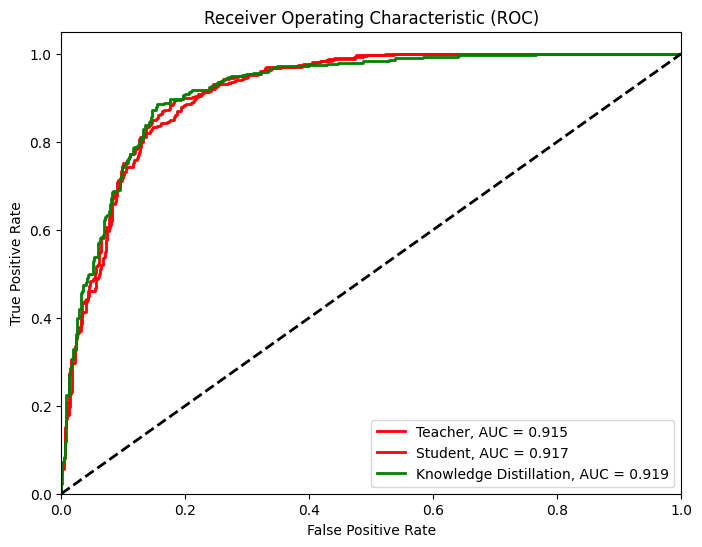

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from keras import models
from sklearn import metrics
# Generate some sample data (replace this with your actual data)
# Assuming y_true and y_pred are your true labels and predicted probabilities respectively


y_true=ytest_student[:,1]

# Calculate ROC curve and AUC for Teacher

#fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
fpr_teacher, tpr_teacher, thresholds_teacher  = metrics.roc_curve(y_true, y_prob_teacher[:,1])
roc_auc_teacher = auc(fpr_teacher, tpr_teacher)

# Calculate ROC curve and AUC for Student
fpr_student, tpr_student, thresholds_student = metrics.roc_curve(y_true, y_prob_st[:,1])
roc_auc_student = auc(fpr_student, tpr_student)
# Calculate ROC curve and AUC for Knowlege distillation
fpr_KD, tpr_KD, thresholds_KD = metrics.roc_curve(y_true, y_prob_KD[:,1])
roc_auc_KD = auc(fpr_KD, tpr_KD)
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_teacher, tpr_teacher, color='red', lw=2, label='Teacher, AUC = {:.3f}'.format(roc_auc_teacher))
plt.plot(fpr_student, tpr_student,  color='red', lw=2, label='Student, AUC = {:.3f}'.format(roc_auc_student))
plt.plot(fpr_KD, tpr_KD, color='green',lw=2, label='Knowledge Distillation, AUC = {:.3f}'.format(roc_auc_KD))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten
from keras.layers import Embedding
TIME_STEPS = 33
INPUT_SIZE = 300
def create_bilstm_model():
  model = Sequential()
  model.add(Embedding(vocab_size + 1, 300, input_length=MAX_SEQUENCE_LENGTH_student, trainable=True))
  model.add(Bidirectional(LSTM(units=16, batch_input_shape=(None, TIME_STEPS, INPUT_SIZE), return_sequences=True)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(2, activation='softmax'))
  #model.compile(optimizer=keras.optimizers.AdamW(learning_rate = 0.0001), loss=keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy','AUC'])


  return model
model_BiLSTM = create_bilstm_model()
model_BiLSTM.compile(optimizer=keras.optimizers.AdamW(learning_rate = 0.0001), loss=keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy','AUC'])
model_BiLSTM.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 31, 300)           6600      
                                                                 
 bidirectional_5 (Bidirecti  (None, 31, 32)            40576     
 onal)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 31, 32)            0         
                                                                 
 flatten_2 (Flatten)         (None, 992)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               127104    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                      